In [1]:

import pandas as pd 
import numpy as np 
import gc
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def trim_categories(df, cols_list):
    for col in cols_list:
        df[col].cat.rename_categories(df[col].cat.categories.str.strip(), inplace=True)

In [3]:
levels_keep_cols = ['TankId', 'TankLevelPercent', 'TankLevelGallons', 'ExactFuelEventId']
levels_col_types = {'TankId': 'category',
             'ExactFuelEventId': 'uint32',
             'TankLevelPercent': 'float32',
             'TankLevelGallons': 'float32'}
#Rows with TankId == '2' are dropped on read-in, after being manually identified
levels_fueltank_df = pd.read_csv('data/Extranet2.ExactFuelTankLevels.csv', 
                                 skiprows=[48671, 1824800, 4579415, 5656381],
                                 usecols = levels_keep_cols, 
                                 dtype=levels_col_types ).set_index(
    'ExactFuelEventId').drop(
    ['TankId'], axis=1)

#levels_fueltank_df = levels_fueltank_df.set_index('ExactFuelEventId').drop(['TankId'], axis=1)

In [4]:
optimization_fuel_df = pd.read_csv('data/BGEIDSC.EF2EFFP.csv',
                                   index_col = 'TRUCK',
                                   dtype={'TANKCAP': 'uint16', 'TRUCK' : 'uint32'},
                                  usecols = ['TRUCK', 'TANKCAP'])
optimization_fuel_df.columns = [s.lower() for s in optimization_fuel_df.columns]

In [5]:
#trim_categories(optimization_fuel_df, ['truck'])
#optimization_fuel_df.set_index('truck', inplace=True)

In [6]:
optimization_fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 836 entries, 1 to 2176
Data columns (total 1 columns):
tankcap    836 non-null uint16
dtypes: uint16(1)
memory usage: 8.2 KB


In [7]:
optimization_fuel_df.head(n=5)

,tankcap
TRUCK,
1,200
243,200
244,200
245,200
246,200


In [8]:
units_df = pd.read_csv('data/IBGEFILE.UNITS.csv', 
                       dtype = {'UNMAKE': 'category'})
#Can drop non-int units
units_df.columns = ['unit_number', 'model_year', 'make'] 

# Trim white space from category strings 

# Remove invalid entries
units_df.unit_number = pd.to_numeric(units_df.unit_number, errors = 'coerce')
units_df = units_df[units_df.unit_number != 1].dropna().set_index('unit_number')
#units_df = units_df[units_df.unit_number.isin(['ZEBE', 'CCTRK', 'BGXL', '1']) == False]
#set index

trim_categories(units_df, ['make'])
# Fix typos
units_df.make[units_df.make.isin(['KENOWRTH', 'KEWORTH'])] = 'KENWORTH'

In [9]:
# 5 rows deleted
units_df.shape

(704, 2)

In [10]:
units_df.head(n=5)

,model_year,make
unit_number,,
535.0,1996,PETERBILT
534.0,1996,PETERBILT
533.0,1996,PETERBILT
532.0,1996,PETERBILT
531.0,1996,PETERBILT


In [11]:
transaction_df_cols = ['tr_id', 'tr_date', 'tr_time', 'tr_station_id', 'tr_station_name',
                         'tr_station_cty', 'tr_station_st', 'tr_drvr_code', 'tr_unit_id', 
                         'tr_item_cd1', 'tr_item_qty1', 'tr_item_cd2', 'tr_item_qty2',
                          'tr_item_cd3', 'tr_item_qty3', 'tr_item_cd4', 'tr_item_qty4',
                          'tr_item_cd5', 'tr_item_qty5', 'tr_item_cd6', 'tr_item_qty6']
tr_dtypes= {'tr_id' : 'uint32',  
            'tr_date' : 'uint32', 
            'tr_time' : 'uint32', 
            'tr_station_name' : 'object', 
            'tr_station_cty' : 'object', 
            'tr_station_st' : 'object', 
            'tr_drvr_code' : 'category', 
            'tr_unit_id' : 'category', 
            'tr_item_cd1' : 'category', 
            'tr_item_qty1' : 'float32', 
            'tr_item_cd2' : 'category', 
            'tr_item_qty2' : 'float32', 
            'tr_item_cd3' : 'category', 
            'tr_item_qty3' : 'float32', 
            'tr_item_cd4' : 'category', 
            'tr_item_qty4' : 'float32', 
            'tr_item_cd5' : 'category', 
            'tr_item_qty5' : 'float32', 
            'tr_item_cd6' : 'category', 
            'tr_item_qty6' : 'float32'}
act_fuel_transactions = ['ULSD', 'FUEL', 'CDSL', 'DSL1', 'BDSL']
transaction_df = pd.read_csv('data/BGETCHDATA.PTCHTRANH.csv', names = transaction_df_cols, dtype = tr_dtypes, header=0 )

# Trim white space from category strings 
trim_categories(transaction_df, ['tr_drvr_code','tr_unit_id','tr_item_cd1', 'tr_item_cd2', 'tr_item_cd3', 'tr_item_cd4', 'tr_item_cd5', 'tr_item_cd6' ])

In [12]:
transaction_df.head(n=5)

,tr_id,tr_date,tr_time,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,...,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6
0,42574765,20170101,20,520277,FLYING J VANDALIA 97,VANDALIA,OH,ULAL,1564,SCLE,...,,0.00,,0.0,,0.0,,0.0,,0.0
1,42575331,20170101,48,516202,PILOT NEW BRAUNFELS 330,NEW BRAUNFELS,TX,MANRI,1584,ULSD,...,DEFD,7.71,CADV,1.0,,0.0,,0.0,,0.0
2,42578678,20170101,134,516277,PILOT 421,DALTON,GA,RUSR,1713,ULSD,...,DEFD,4.12,,0.0,,0.0,,0.0,,0.0
3,42578722,20170101,137,231100,FJ-BRUNSWICK 627,BRUNSWICK,GA,FOSJA,1711,ULSD,...,,0.00,,0.0,,0.0,,0.0,,0.0
4,42579695,20170101,302,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,HICWIL,1837,ULSD,...,,0.00,,0.0,,0.0,,0.0,,0.0


In [13]:
transaction_df.shape

(147861, 21)

In [14]:
transaction_df.dtypes


tr_id                uint32
tr_date              uint32
tr_time              uint32
tr_station_id         int64
tr_station_name      object
tr_station_cty       object
tr_station_st        object
tr_drvr_code       category
tr_unit_id         category
tr_item_cd1        category
tr_item_qty1        float32
tr_item_cd2        category
tr_item_qty2        float32
tr_item_cd3        category
tr_item_qty3        float32
tr_item_cd4        category
tr_item_qty4        float32
tr_item_cd5        category
tr_item_qty5        float32
tr_item_cd6        category
tr_item_qty6        float32
dtype: object

In [15]:
#confirm no junk data in this col (returns false if no NaNs)
None in transaction_df.tr_time

# 20170112 3

#Combine tr_date and tr_time into a single date time column
    #1. zero pad tr_time on left for interpretation as military time
        #cast tr_time as string
transaction_df.tr_time = transaction_df.tr_time.astype(str)

# 20170112 '3' Time column is now a string
#ensure none of my strings are over 4 digits in length
for s in transaction_df.tr_time:
    assert len(s) < 5

#check for blanks
'' in transaction_df.tr_time

#add zeros to the left until each cell is len 4
zero_padded_time = []
for s in transaction_df.tr_time:
    while len(s) < 4:
        s = '0' + s
    zero_padded_time.append(s)
# 20170112 '0003' zero padded minutes
#spot check
for s in zero_padded_time:
    assert len(s) == 4

transaction_df.tr_time = zero_padded_time

#append tr_date (as string) and tr_time together, and then convert them to dateime
#transaction_df.tr_datetime 
tst = [datetime.strptime(str(d) + 
                         t, '%Y%m%d%H%M') 
       for d, t in zip(transaction_df.tr_date,
                       transaction_df.tr_time)]
#love list comprehensions

transaction_df['tr_datetime'] = tst#assign

#drop superfluous columns
transaction_df.drop(['tr_date','tr_time'], axis = 'columns', inplace=True)
transaction_df.head()

,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime
0,42574765,520277,FLYING J VANDALIA 97,VANDALIA,OH,ULAL,1564,SCLE,1.000000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-01 00:20:00
1,42575331,516202,PILOT NEW BRAUNFELS 330,NEW BRAUNFELS,TX,MANRI,1584,ULSD,137.399994,DEFD,7.71,CADV,1.0,,0.0,,0.0,,0.0,2017-01-01 00:48:00
2,42578678,516277,PILOT 421,DALTON,GA,RUSR,1713,ULSD,137.929993,DEFD,4.12,,0.0,,0.0,,0.0,,0.0,2017-01-01 01:34:00
3,42578722,231100,FJ-BRUNSWICK 627,BRUNSWICK,GA,FOSJA,1711,ULSD,45.000000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-01 01:37:00
4,42579695,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,HICWIL,1837,ULSD,107.360001,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-01 03:02:00


In [16]:
# These rows are dropped - 85 rows dropped 
transaction_df[transaction_df.tr_unit_id.isin(['OFFICE', '']) == True] 

,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime
1174,42977478,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,SPED,OFFICE,ULSD,50.000000,,0.0,,0.0,,0.0,,0.0,,0.0,2017-01-05 07:40:00
1383,43037746,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,SPED,OFFICE,ULSD,130.570007,,0.0,,0.0,,0.0,,0.0,,0.0,2017-01-05 14:57:00
6812,44866479,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,HILB,,ULSD,60.790001,,0.0,,0.0,,0.0,,0.0,,0.0,2017-01-21 06:08:00
6955,44908231,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,HILB,,ULSD,30.440001,,0.0,,0.0,,0.0,,0.0,,0.0,2017-01-21 14:33:00
13493,47176337,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,SMIFR,,ULSD,96.269997,,0.0,,0.0,,0.0,,0.0,,0.0,2017-02-09 09:11:00
15203,47747773,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,SMIFR,,ULSD,62.840000,,0.0,,0.0,,0.0,,0.0,,0.0,2017-02-14 10:46:00
16503,48174487,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,SMIFR,,ULSD,82.480003,,0.0,,0.0,,0.0,,0.0,,0.0,2017-02-17 11:53:00
16583,48198811,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,SPED,OFFICE,ULSD,50.000000,,0.0,,0.0,,0.0,,0.0,,0.0,2017-02-17 15:01:00
17310,48478526,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,1974,,ULSD,10.060000,,0.0,,0.0,,0.0,,0.0,,0.0,2017-02-20 12:12:00
18077,48727766,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,SMIFR,,ULSD,88.010002,,0.0,,0.0,,0.0,,0.0,,0.0,2017-02-22 09:42:00


In [17]:
# Drops Office and blank Unit IDs
transaction_df = transaction_df[transaction_df.tr_unit_id.isin(['OFFICE', '      ']) == False]

In [18]:
transaction_df.head(n=5)

,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime
0,42574765,520277,FLYING J VANDALIA 97,VANDALIA,OH,ULAL,1564,SCLE,1.000000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-01 00:20:00
1,42575331,516202,PILOT NEW BRAUNFELS 330,NEW BRAUNFELS,TX,MANRI,1584,ULSD,137.399994,DEFD,7.71,CADV,1.0,,0.0,,0.0,,0.0,2017-01-01 00:48:00
2,42578678,516277,PILOT 421,DALTON,GA,RUSR,1713,ULSD,137.929993,DEFD,4.12,,0.0,,0.0,,0.0,,0.0,2017-01-01 01:34:00
3,42578722,231100,FJ-BRUNSWICK 627,BRUNSWICK,GA,FOSJA,1711,ULSD,45.000000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-01 01:37:00
4,42579695,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,HICWIL,1837,ULSD,107.360001,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-01 03:02:00


In [19]:
fuel_trans_df = transaction_df[transaction_df.tr_item_cd1.isin(act_fuel_transactions)]

In [20]:
events_keep_cols = ['Id', 'EventTimeStamp', 'EquipmentID', 
                    'DriverID', 'Latitude', 'Longitude', 'LocationTimeStamp', 
                    'Speed', 'Odometer', 'IgnitionStatus', 'EFReportReason']
events_col_types = {'DriverID': 'category',
             'EFReportReason': 'category',
             'EquipmentID': 'uint32',
             'Id': 'uint32',
             'IgnitionStatus': 'category',
             'Latitude': 'float64',
             'Longitude': 'float64',
             'Odometer': 'float64',
             'Speed': 'uint16'}

events_levels_df = pd.read_csv('data/Extranet2.ExactFuelEvents.csv', 
                             usecols=events_keep_cols, 
                            dtype=events_col_types, 
                             index_col = 'Id',
                             parse_dates=['EventTimeStamp', 'LocationTimeStamp'], 
                            infer_datetime_format=True).merge(
    levels_fueltank_df, copy=False, how='inner', left_index=True, right_index=True).merge(
    optimization_fuel_df, copy=False, how='left', left_on='EquipmentID', right_index=True)

trim_categories(events_levels_df, ['DriverID','EFReportReason', 'IgnitionStatus' ])

C:\Users\Suhasini\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [21]:
# Save 220 MB memory and 
levels_fueltank_df.index = levels_fueltank_df.index.astype('uint64')
gc.collect()

2807

In [22]:
events_levels_df.shape

(7908406, 13)

In [23]:
performance_df = pd.read_csv('data/Extranet2.QCPerformanceExtracts.csv',
                            parse_dates=['EventTimeStamp','LocationTimeStamp', 'DataStartTimeStamp','DataEndTimeStamp' ], 
                            infer_datetime_format=True)
# Remove invalid Truck IDs
#performance_df = performance_df[performance_df.EquipmentID < 9999]

In [24]:
performance_df.head(n=5)

,Id,ESS_Id,EventTimeStamp,EquipmentID,MCTNumber,EquipmentType,DriverID,Driver2ID,Latitude,Longitude,...,ExcessSpeedTime,TotalFuelUsed,IdleFuelUsed,FaultFlag,RegisteredDriver,CruiseControlTime,TopGearTime,GearDataSource,SpeedUnits,SpeedMatrix
0,76818,13641356,2017-01-01 07:29:49,1995,105356577,tractor,LYNS,NaN,36.066249,-86.434814,...,0,0.3,0.3,0,0,0,0,3,MPH,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,76819,13641357,2017-01-01 07:29:50,1995,105356577,tractor,LYNS,NaN,36.066249,-86.434814,...,0,239.7,21.2,0,1,49,1399,3,MPH,"301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
2,76820,13641432,2017-01-01 07:49:44,105420005,105420005,tractor,LOTG,NaN,36.195138,-83.174583,...,0,246.1,3.2,0,1,1014,1362,3,MPH,"62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
3,76821,13643644,2017-01-01 13:58:17,1972,105363528,tractor,DINE,NaN,36.194444,-83.175185,...,0,0.2,0.1,0,0,0,0,3,MPH,"110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
4,76822,13643645,2017-01-01 13:58:18,1972,105363528,tractor,DINE,NaN,36.194444,-83.175185,...,0,202.1,1.5,1,1,12,1298,3,MPH,"112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."


In [25]:
events_levels_df.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 7908406 entries, 12649083 to 21150506
Data columns (total 13 columns):
EventTimeStamp       datetime64[ns]
EquipmentID          uint32
DriverID             category
Latitude             float64
Longitude            float64
LocationTimeStamp    datetime64[ns]
Speed                uint16
Odometer             float64
IgnitionStatus       category
EFReportReason       category
TankLevelPercent     float32
TankLevelGallons     float32
tankcap              uint16
dtypes: category(3), datetime64[ns](2), float32(2), float64(3), uint16(2), uint32(1)
memory usage: 512.9 MB


In [26]:
events_levels_df.isnull().sum()

EventTimeStamp            0
EquipmentID               0
DriverID             109883
Latitude                  0
Longitude                 0
LocationTimeStamp         0
Speed                     0
Odometer                  0
IgnitionStatus            0
EFReportReason            0
TankLevelPercent          0
TankLevelGallons          0
tankcap                   0
dtype: int64

In [27]:
events_levels_df.head(n=5)

,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Odometer,IgnitionStatus,EFReportReason,TankLevelPercent,TankLevelGallons,tankcap
12649083,2017-01-01 00:00:32.387,1992,BATK,30.34642,-81.70724,2017-01-01 00:00:30,0,39895.5,2,1,50.700001,101.400002,200
12649084,2017-01-01 00:01:24.867,1712,TAYANT,36.93953,-84.09541,2017-01-01 00:01:27,0,360378.8,1,2,78.000000,156.000000,200
12649092,2017-01-01 00:04:15.053,1713,RUSR,35.58664,-84.52786,2017-01-01 00:04:17,67,377577.4,1,2,31.700001,63.400002,200
12649102,2017-01-01 00:04:10.260,1585,MCAD,35.15430,-90.14263,2017-01-01 00:04:10,0,513931.8,1,2,43.200001,108.000000,250
12649103,2017-01-01 00:10:13.187,1564,ULAL,39.90268,-84.19254,2017-01-01 00:10:11,3,498691.0,1,2,50.299999,125.750000,250


In [28]:
events_levels_df[events_levels_df['DriverID'] == 'DYET']

,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Odometer,IgnitionStatus,EFReportReason,TankLevelPercent,TankLevelGallons,tankcap
12649149,2017-01-01 00:51:47.470,1918,DYET,36.06672,-86.43406,2017-01-01 00:51:46,0,90818.7,1,0,51.200001,102.400002,200
12649194,2017-01-01 01:06:47.660,1918,DYET,36.06672,-86.43408,2017-01-01 01:06:46,0,90818.7,1,2,51.200001,102.400002,200
12649213,2017-01-01 01:21:47.707,1918,DYET,36.06671,-86.43411,2017-01-01 01:21:46,0,90818.7,1,2,51.200001,102.400002,200
12649234,2017-01-01 01:36:47.847,1918,DYET,36.06671,-86.43411,2017-01-01 01:36:47,0,90818.7,1,2,51.200001,102.400002,200
12649245,2017-01-01 01:51:47.877,1918,DYET,36.06674,-86.43410,2017-01-01 01:51:47,0,90818.7,1,2,51.200001,102.400002,200
12651765,2017-01-01 02:36:58.003,1918,DYET,36.06671,-86.43410,2017-01-01 02:36:58,0,90818.7,1,2,51.200001,102.400002,200
12651766,2017-01-01 02:51:58.127,1918,DYET,36.06675,-86.43405,2017-01-01 02:51:54,0,90818.7,1,2,51.200001,102.400002,200
12651767,2017-01-01 03:06:58.160,1918,DYET,36.06679,-86.43406,2017-01-01 03:06:57,0,90818.7,1,2,51.200001,102.400002,200
12651768,2017-01-01 03:21:58.220,1918,DYET,36.06668,-86.43411,2017-01-01 03:21:58,0,90818.7,1,2,51.200001,102.400002,200
12651769,2017-01-01 03:36:58.330,1918,DYET,36.06671,-86.43411,2017-01-01 03:36:58,0,90818.7,1,2,51.200001,102.400002,200


In [29]:
performance_df[performance_df['DriverID']=='DYET']

,Id,ESS_Id,EventTimeStamp,EquipmentID,MCTNumber,EquipmentType,DriverID,Driver2ID,Latitude,Longitude,...,ExcessSpeedTime,TotalFuelUsed,IdleFuelUsed,FaultFlag,RegisteredDriver,CruiseControlTime,TopGearTime,GearDataSource,SpeedUnits,SpeedMatrix
318,77136,13660247,2017-01-03 04:25:40,1918,105381868,tractor,DYET,NaN,36.194999,-83.174999,...,0,96.3,2.5,1,1,85,563,3,MPH,"1796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
771,77589,13803686,2017-01-10 04:27:51,1918,105381868,tractor,DYET,NaN,40.373703,-76.676620,...,0,437.1,5.2,0,1,707,2485,3,MPH,"3941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
1582,78400,13942767,2017-01-17 04:19:42,1918,105381868,tractor,DYET,NaN,37.932685,-79.233981,...,0,436.2,2.6,1,1,527,2484,3,MPH,"4117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
2137,78955,14083105,2017-01-24 04:18:59,1918,105381868,tractor,DYET,NaN,33.457314,-90.629490,...,0,248.5,2.6,0,1,415,1359,3,MPH,"3546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
2815,79633,14219049,2017-01-31 04:14:19,1918,105381868,tractor,DYET,NaN,35.992962,-87.488703,...,0,271.8,2.5,0,1,661,1617,3,MPH,"1872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
3378,80196,14357014,2017-02-07 04:14:19,1918,105381868,tractor,DYET,NaN,40.030509,-81.447453,...,0,305.6,4.8,0,1,452,1949,3,MPH,"3208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
3958,80776,14499475,2017-02-14 04:15:56,1918,105381868,tractor,DYET,NaN,38.705046,-80.662870,...,0,463.8,4.0,0,1,862,2761,3,MPH,"1975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
4579,81397,14642654,2017-02-21 04:07:53,1918,105381868,tractor,DYET,NaN,37.932453,-79.234120,...,0,353.1,4.6,1,1,500,2231,3,MPH,"1580,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
5224,82042,14784556,2017-02-28 04:21:00,1918,105381868,tractor,DYET,NaN,36.467638,-86.685833,...,0,347.2,4.3,0,1,318,1840,3,MPH,"3199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
5856,82674,14923633,2017-03-07 04:18:03,1918,105381868,tractor,DYET,NaN,36.066435,-86.435277,...,0,392.7,5.5,0,1,632,2325,3,MPH,"3433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."


In [30]:
events_levels_df['DriverID'].value_counts()

DYET          33866
SIMJIM        27161
VAUJAM        25712
ULAL          25449
ECKS          24105
CHAJO         23888
BULR          22974
BROD03        22253
CUNW          22195
PERT          21992
STEGA         21950
NARJ          21551
GALJU         21513
CHRN          21337
ANTR          20995
SWEJ          20839
FARMI         20808
TAYJON        20780
EDWTI         20767
SAVE          20310
DINE          20227
MORJAM        20193
CRES          19952
RUTP          19832
PRUH          19723
MARWI         19672
DEPK          19665
SIMJE         19398
SUTD          19355
WIET          19267
              ...  
36728             1
DAVKEN            1
KUNDAV            1
FURLA             1
BEAT              1
TAYDO1            1
RYAC              0
DUNG              0
BRAMAT            0
EDNJ              0
OWEJE             0
SHOP!             0
WORJON            0
BIVD              0
HARJI             0
KANR              0
NESD              0
JOHLO             0
CUMR              0


In [31]:
performance_df = pd.read_csv('data/Extranet2.QCPerformanceExtracts.csv',
                            parse_dates=['EventTimeStamp','LocationTimeStamp', 'DataStartTimeStamp','DataEndTimeStamp' ], 
                            infer_datetime_format=True)
# Remove invalid Truck IDs
performance_df = performance_df[performance_df.EquipmentID < 9999]

In [32]:
df_names_list = ['events_levels_df', 'levels_fueltank_df', 'optimization_fuel_df',
                 'units_df', 'transaction_df', 'performance_df', 'fuel_trans_df']
df_list = [events_levels_df, levels_fueltank_df, optimization_fuel_df, 
           units_df, transaction_df, performance_df, fuel_trans_df]
df_dict = dict(zip(df_names_list, df_list))

for k, v in df_dict.items():
    print(k + ' shape: ' + str(v.shape))

events_levels_df shape: (7908406, 13)
levels_fueltank_df shape: (7908824, 2)
optimization_fuel_df shape: (836, 1)
units_df shape: (704, 2)
transaction_df shape: (147813, 20)
performance_df shape: (32253, 32)
fuel_trans_df shape: (104008, 20)


In [570]:
fuel_trans_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 104008 entries, 1 to 147860
Data columns (total 20 columns):
tr_id              104008 non-null uint32
tr_station_id      104008 non-null int64
tr_station_name    104008 non-null object
tr_station_cty     104008 non-null object
tr_station_st      104008 non-null object
tr_drvr_code       104008 non-null category
tr_unit_id         104008 non-null category
tr_item_cd1        104008 non-null category
tr_item_qty1       104008 non-null float32
tr_item_cd2        104008 non-null category
tr_item_qty2       104008 non-null float32
tr_item_cd3        104008 non-null category
tr_item_qty3       104008 non-null float32
tr_item_cd4        104008 non-null category
tr_item_qty4       104008 non-null float32
tr_item_cd5        104008 non-null category
tr_item_qty5       104008 non-null float32
tr_item_cd6        104008 non-null category
tr_item_qty6       104008 non-null float32
tr_datetime        104008 non-null datetime64[ns]
dtypes: category(8),

In [34]:
#fuel_transaction df contating the fuel list
fuel_trans_df.tr_item_cd1.unique()
#fuel_trans_df.tr_item_cd1.value_counts()

[ULSD, FUEL, CDSL, DSL1, BDSL]
Categories (5, object): [ULSD, FUEL, CDSL, DSL1, BDSL]

In [35]:
fuel_trans_df.groupby(['tr_drvr_code', 'tr_datetime']).size().to_frame('transactions').shape[0]

104007

In [36]:
print("unique tr datetime values  : " , str(len(fuel_trans_df.tr_datetime.unique())))

unique tr datetime values  :  93742


In [37]:
fuel_trans_df.head(5)

,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime
1,42575331,516202,PILOT NEW BRAUNFELS 330,NEW BRAUNFELS,TX,MANRI,1584,ULSD,137.399994,DEFD,7.71,CADV,1.0,,0.0,,0.0,,0.0,2017-01-01 00:48:00
2,42578678,516277,PILOT 421,DALTON,GA,RUSR,1713,ULSD,137.929993,DEFD,4.12,,0.0,,0.0,,0.0,,0.0,2017-01-01 01:34:00
3,42578722,231100,FJ-BRUNSWICK 627,BRUNSWICK,GA,FOSJA,1711,ULSD,45.000000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-01 01:37:00
4,42579695,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,HICWIL,1837,ULSD,107.360001,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-01 03:02:00
5,42579752,519125,PILOT #575,ST MARYS,GA,BATK,1992,ULSD,93.879997,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-01 03:07:00


In [38]:
print(fuel_trans_df.groupby(['tr_drvr_code','tr_datetime','tr_unit_id']).size().to_frame('tr').sort_values('tr',ascending=False).head(5))

                                             tr
tr_drvr_code tr_datetime         tr_unit_id    
CRAMI        2017-02-14 16:15:00 1795         2
             2017-02-20 18:00:00 1963         1
PATCA        2017-05-02 09:35:00 1590         1
             2017-05-19 19:31:00 1863         1
             2017-05-18 17:20:00 1863         1


In [39]:
print(fuel_trans_df.groupby(['tr_unit_id', 'tr_datetime','tr_drvr_code']).size().to_frame('tr').sort_values('tr', ascending=False).head(5))

                                             tr
tr_unit_id tr_datetime         tr_drvr_code    
1795       2017-02-14 16:15:00 CRAMI          2
           2017-01-21 06:08:00 HILB           1
1924       2017-09-05 02:51:00 HERV           1
           2017-09-01 08:21:00 HERV           1
           2017-09-01 00:24:00 HERV           1


In [40]:
fuel_trans_df[(fuel_trans_df.tr_drvr_code == 'CRAMI') & (fuel_trans_df.tr_datetime=='2017-02-14 16:15:00')] 

,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime
15383,47795054,516013,PILOT HURRICANE MILLS 053,HURRICANE MILLS,TN,CRAMI,1795,ULSD,1.360000,,0.0,,0.0,,0.0,,0.0,,0.0,2017-02-14 16:15:00
15385,47795128,516013,PILOT HURRICANE MILLS 053,HURRICANE MILLS,TN,CRAMI,1795,ULSD,60.189999,CADV,1.0,,0.0,,0.0,,0.0,,0.0,2017-02-14 16:15:00


In [41]:

events_levels_df.head()

,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Odometer,IgnitionStatus,EFReportReason,TankLevelPercent,TankLevelGallons,tankcap
12649083,2017-01-01 00:00:32.387,1992,BATK,30.34642,-81.70724,2017-01-01 00:00:30,0,39895.5,2,1,50.700001,101.400002,200
12649084,2017-01-01 00:01:24.867,1712,TAYANT,36.93953,-84.09541,2017-01-01 00:01:27,0,360378.8,1,2,78.000000,156.000000,200
12649092,2017-01-01 00:04:15.053,1713,RUSR,35.58664,-84.52786,2017-01-01 00:04:17,67,377577.4,1,2,31.700001,63.400002,200
12649102,2017-01-01 00:04:10.260,1585,MCAD,35.15430,-90.14263,2017-01-01 00:04:10,0,513931.8,1,2,43.200001,108.000000,250
12649103,2017-01-01 00:10:13.187,1564,ULAL,39.90268,-84.19254,2017-01-01 00:10:11,3,498691.0,1,2,50.299999,125.750000,250


each driver , truckid,odometer readings

In [42]:
events_levels_df.groupby(['DriverID','EquipmentID']).Odometer.agg('max').head(50)

DriverID  EquipmentID
36728     1842           131107.2
ABBV      1821           233502.4
ACHC      1623           525754.6
ADADE     1555           505914.4
ADAG      1857           148476.9
ADAR      1572           536621.2
          1950           226432.8
ALBJ      1558           505196.5
          1645           531568.6
          1743           463570.1
ALBME     1549           585906.2
          1696           514256.1
ALDS      1753           429658.1
ALLG      1853           262714.2
ALLMA     1959            98892.4
ALLMIC    1802           331097.0
ALLW      1650           530790.6
ALSA      1771           417030.5
AMAD      1559           607715.4
          1992           162751.4
          2052           108554.7
AMMC      1619           490560.1
          1628           451940.5
          1788           295227.9
          1952           220263.1
ANDANT    1526           590466.3
ANDC      1710           498030.0
ANDJER    1780           408374.3
          2119            

In [43]:
events_levels_df.groupby(['DriverID','EquipmentID']).size().to_frame('size').reset_index().sort_values(['DriverID', 'size'], ascending=[True, False]).head(5)


,DriverID,EquipmentID,size
0,36728,1842,1
1,ABBV,1821,6182
2,ACHC,1623,78
3,ADADE,1555,20
4,ADAG,1857,3437


In [44]:
performance_df.groupby(['DriverID','EquipmentID']).size().tail(5)

DriverID  EquipmentID
WYNF      2077           15
YANH      1839            9
YOUJE     1795           16
YOUW01    1706           17
ZAMJ      1588           15
dtype: int64

In [45]:
df_tr_crami = fuel_trans_df[(fuel_trans_df.tr_unit_id=='1795') & (fuel_trans_df.tr_drvr_code == 'CRAMI')]



In [46]:
df_tr_crami[df_tr_crami.tr_item_qty1 <= 50 ]

,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime
15383,47795054,516013,PILOT HURRICANE MILLS 053,HURRICANE MILLS,TN,CRAMI,1795,ULSD,1.360000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-02-14 16:15:00
19470,49231683,231889,FJ-ROCK HILL 714,ROCK HILL,SC,CRAMI,1795,ULSD,45.380001,CADV,1.00,,0.0,,0.0,,0.0,,0.0,2017-02-26 14:02:00
35851,55253748,231846,FJ-MAX MEADOWS 750,FORT CHISWELL,VA,CRAMI,1795,ULSD,0.030000,DEFD,11.94,,0.0,,0.0,,0.0,,0.0,2017-04-15 23:10:00


In [47]:
print(df_tr_crami.shape)
print('total gallons purchased by crami :' , df_tr_crami.tr_item_qty1.sum())

(60, 20)
total gallons purchased by crami : 6023.7


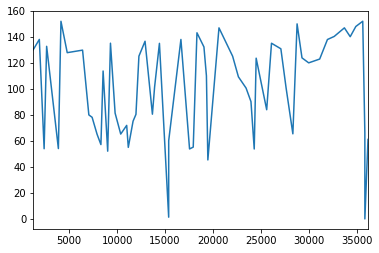

In [48]:
df_tr_crami.tr_item_qty1.plot()
plt.show()

In [49]:
events_levels_df.columns

Index(['EventTimeStamp', 'EquipmentID', 'DriverID', 'Latitude', 'Longitude',
       'LocationTimeStamp', 'Speed', 'Odometer', 'IgnitionStatus',
       'EFReportReason', 'TankLevelPercent', 'TankLevelGallons', 'tankcap'],
      dtype='object')

In [50]:
df_events_levels_crami = events_levels_df[(events_levels_df['EquipmentID'] == 1795) & (events_levels_df['DriverID'] == 'CRAMI')]
df_events_levels_crami.head(5)

,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Odometer,IgnitionStatus,EFReportReason,TankLevelPercent,TankLevelGallons,tankcap
12659618,2017-01-02 11:51:07.673,1795,CRAMI,35.33821,-89.89231,2017-01-02 11:51:10,0,211987.7,2,1,48.400002,96.800003,200
12659630,2017-01-02 11:51:47.657,1795,CRAMI,35.33821,-89.89231,2017-01-02 11:51:50,0,211987.7,2,0,48.400002,96.800003,200
12659897,2017-01-02 12:10:47.673,1795,CRAMI,35.33823,-89.89228,2017-01-02 12:10:50,0,211987.7,1,0,48.400002,96.800003,200
12660072,2017-01-02 12:25:47.783,1795,CRAMI,35.31063,-89.74177,2017-01-02 12:25:50,58,211998.0,1,2,40.000000,80.000000,200
12660328,2017-01-02 12:49:37.830,1795,CRAMI,35.39153,-89.41164,2017-01-02 12:49:40,12,212022.7,1,2,34.599998,69.199997,200


In [51]:
print((df_events_levels_crami.Odometer.max() - df_events_levels_crami.Odometer.min()) /6023.7) 

print() #/ )

7.10339160317



Performance df - total fuel used = 6197 

In [52]:
6197-6024

173

CRAMI mpg is 7.10 -- seems to be normal not  noisy ...
but there is a difference of 173 gallons reported ...

In [53]:
df_events_levels_crami['diff_timestamp'] = df_events_levels_crami['EventTimeStamp'].diff()
#ddf['a'].diff()

C:\Users\Suhasini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_events_levels_crami.head(50)

,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Odometer,IgnitionStatus,EFReportReason,TankLevelPercent,TankLevelGallons,tankcap,diff_timestamp
12659618,2017-01-02 11:51:07.673,1795,CRAMI,35.33821,-89.89231,2017-01-02 11:51:10,0,211987.7,2,1,48.400002,96.800003,200,NaT
12659630,2017-01-02 11:51:47.657,1795,CRAMI,35.33821,-89.89231,2017-01-02 11:51:50,0,211987.7,2,0,48.400002,96.800003,200,00:00:39.984000
12659897,2017-01-02 12:10:47.673,1795,CRAMI,35.33823,-89.89228,2017-01-02 12:10:50,0,211987.7,1,0,48.400002,96.800003,200,00:19:00.016000
12660072,2017-01-02 12:25:47.783,1795,CRAMI,35.31063,-89.74177,2017-01-02 12:25:50,58,211998.0,1,2,40.000000,80.000000,200,00:15:00.110000
12660328,2017-01-02 12:49:37.830,1795,CRAMI,35.39153,-89.41164,2017-01-02 12:49:40,12,212022.7,1,2,34.599998,69.199997,200,00:23:50.047000
12660357,2017-01-02 12:52:07.830,1795,CRAMI,35.39031,-89.41047,2017-01-02 12:52:10,0,212022.9,2,1,32.099998,64.199997,200,00:02:30
12660430,2017-01-02 12:58:37.847,1795,CRAMI,35.39949,-89.39994,2017-01-02 12:58:40,67,212023.9,1,0,33.400002,66.800003,200,00:06:30.017000
12660741,2017-01-02 13:19:37.893,1795,CRAMI,35.58453,-89.09197,2017-01-02 13:19:40,0,212047.0,1,2,32.700001,65.400002,200,00:21:00.046000
12660902,2017-01-02 13:34:38.003,1795,CRAMI,35.61635,-88.88953,2017-01-02 13:34:40,8,212059.4,1,2,31.000000,62.000000,200,00:15:00.110000
12660937,2017-01-02 13:37:38.050,1795,CRAMI,35.62242,-88.89108,2017-01-02 13:37:40,0,212059.9,2,1,30.299999,60.599998,200,00:03:00.047000


In [55]:
performance_df.columns

Index(['Id', 'ESS_Id', 'EventTimeStamp', 'EquipmentID', 'MCTNumber',
       'EquipmentType', 'DriverID', 'Driver2ID', 'Latitude', 'Longitude',
       'LocationTimeStamp', 'IgnitionStatus', 'TripStatus',
       'DataStartTimeStamp', 'DataEndTimeStamp', 'Distance', 'DriveTime',
       'EngineTime', 'MoveTime', 'IntertripIdleTime', 'ShortIdleTime',
       'OverSpeedTime', 'ExcessSpeedTime', 'TotalFuelUsed', 'IdleFuelUsed',
       'FaultFlag', 'RegisteredDriver', 'CruiseControlTime', 'TopGearTime',
       'GearDataSource', 'SpeedUnits', 'SpeedMatrix'],
      dtype='object')

In [58]:
df_per_crami = performance_df[(performance_df.DriverID == 'CRAMI') & (performance_df.EquipmentID == 1795)]

In [59]:
df_per_crami.TotalFuelUsed.sum()

6197.0

In [60]:
df_crami = df_events_levels_crami[['EventTimeStamp','Odometer']]

In [61]:
df_crami.Odometer.unique()

array([ 211987.7,  211998. ,  212022.7, ...,  254776. ,  254776.3,
        254776.4])

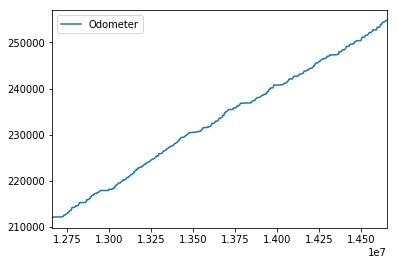

In [62]:
df_crami.plot()
plt.show()

Checking for Drivercode = 'SMID'

In [63]:
#creating a df for smid's transaction details
df_trans_smid = fuel_trans_df[fuel_trans_df.tr_drvr_code == 'SMID']
df_trans_smid.head(5)

,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime
482,42751505,524099,PFJ SOUTHEAST 4599,MONTEAGLE,TN,SMID,2021,ULSD,54.000000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-03 12:39:00
632,42801317,516068,PILOT 144,AUGUSTA,GA,SMID,2021,ULSD,100.599998,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-03 19:29:00
1125,42965922,231889,FJ-ROCK HILL 714,ROCK HILL,SC,SMID,2021,ULSD,91.459999,DEFD,6.74,,0.0,,0.0,,0.0,,0.0,2017-01-05 05:12:00
1595,43122645,231084,FJ-FRANKLIN 661,FRANKLIN,KY,SMID,2021,ULSD,104.190002,DEFD,5.54,,0.0,,0.0,,0.0,,0.0,2017-01-06 08:28:00
2356,43366435,521834,PILOT JASPER 500,JASPER,FL,SMID,2021,ULSD,60.939999,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-08 16:19:00


In [64]:
#smid unique unit ids are 2021 & 2131
df_trans_smid.tr_unit_id.unique()

[2021, 2131]
Categories (2, object): [2021, 2131]

In [65]:
df_trans_smid_2021 = fuel_trans_df[(fuel_trans_df.tr_drvr_code == 'SMID') & (fuel_trans_df.tr_unit_id =='2021')]
df_trans_smid_2021.head(5)

,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime
482,42751505,524099,PFJ SOUTHEAST 4599,MONTEAGLE,TN,SMID,2021,ULSD,54.000000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-03 12:39:00
632,42801317,516068,PILOT 144,AUGUSTA,GA,SMID,2021,ULSD,100.599998,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-03 19:29:00
1125,42965922,231889,FJ-ROCK HILL 714,ROCK HILL,SC,SMID,2021,ULSD,91.459999,DEFD,6.74,,0.0,,0.0,,0.0,,0.0,2017-01-05 05:12:00
1595,43122645,231084,FJ-FRANKLIN 661,FRANKLIN,KY,SMID,2021,ULSD,104.190002,DEFD,5.54,,0.0,,0.0,,0.0,,0.0,2017-01-06 08:28:00
2356,43366435,521834,PILOT JASPER 500,JASPER,FL,SMID,2021,ULSD,60.939999,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-08 16:19:00


In [66]:
df_events_levels_smid_2021 = events_levels_df[(events_levels_df['EquipmentID'] == 2021) & (events_levels_df['DriverID'] == 'SMID')]
df_events_levels_smid_2021

,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Odometer,IgnitionStatus,EFReportReason,TankLevelPercent,TankLevelGallons,tankcap
12680005,2017-01-03 15:06:37.777,2021,SMID,34.38570,-84.91793,2017-01-03 15:06:38,6,914.3,1,0,46.099998,92.199997,200
12680319,2017-01-03 15:21:47.743,2021,SMID,34.21802,-84.75293,2017-01-03 15:21:48,66,929.5,1,2,43.500000,87.000000,200
12680954,2017-01-03 15:53:47.867,2021,SMID,33.90659,-84.47630,2017-01-03 15:53:48,3,960.1,1,2,44.099998,88.199997,200
12681356,2017-01-03 16:08:47.993,2021,SMID,33.90644,-84.47623,2017-01-03 15:53:57,65,967.0,1,2,42.299999,84.599998,200
12681656,2017-01-03 16:23:48.117,2021,SMID,33.90644,-84.47623,2017-01-03 15:53:57,6,972.5,1,2,34.900002,69.800003,200
12681918,2017-01-03 16:38:58.117,2021,SMID,33.90644,-84.47623,2017-01-03 15:53:57,30,976.1,1,2,36.299999,72.599998,200
12682209,2017-01-03 16:53:58.367,2021,SMID,33.90644,-84.47623,2017-01-03 15:53:57,22,980.0,1,2,37.400002,74.800003,200
12683138,2017-01-03 17:44:19.023,2021,SMID,33.90664,-84.47633,2017-01-03 15:53:44,0,1012.3,2,1,32.799999,65.599998,200
12683164,2017-01-03 17:45:29.013,2021,SMID,33.90664,-84.47633,2017-01-03 15:53:44,0,1012.3,2,0,32.799999,65.599998,200
12684251,2017-01-03 17:54:49.110,2021,SMID,33.90664,-84.47633,2017-01-03 15:53:44,67,1024.4,1,0,26.900000,53.799999,200


In [67]:
print(df_trans_smid_2021.shape)
print('total gallons purchased by SMID - 2021(tID) :' , df_trans_smid_2021.tr_item_qty1.sum())

(162, 20)
total gallons purchased by SMID - 2021(tID) : 16177.7


In [68]:
print((df_events_levels_smid_2021.Odometer.max() - df_events_levels_smid_2021.Odometer.min()) /16177.7)

7.41996081025


In [69]:
df_per_smid_2021 = performance_df[(performance_df.DriverID == 'SMID') & (performance_df.EquipmentID == 2021)]
df_per_smid_2021.head(5)

,Id,ESS_Id,EventTimeStamp,EquipmentID,MCTNumber,EquipmentType,DriverID,Driver2ID,Latitude,Longitude,...,ExcessSpeedTime,TotalFuelUsed,IdleFuelUsed,FaultFlag,RegisteredDriver,CruiseControlTime,TopGearTime,GearDataSource,SpeedUnits,SpeedMatrix
422,77240,13660734,2017-01-03 04:51:04,2021,105381865,tractor,SMID,NaN,35.587916,-86.443194,...,0,8.7,0.2,0,0,15,64,3,MPH,"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
424,77242,13660736,2017-01-03 04:51:04,2021,105381865,tractor,SMID,NaN,35.587916,-86.443194,...,0,0.1,0.0,0,1,0,0,3,MPH,"5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1110,77928,13804543,2017-01-10 04:41:30,2021,105381865,tractor,SMID,NaN,33.207175,-84.064907,...,0,0.6,0.5,0,0,0,0,3,MPH,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1111,77929,13804544,2017-01-10 04:41:31,2021,105381865,tractor,SMID,NaN,33.207175,-84.064907,...,0,404.5,1.6,0,1,651,2478,3,MPH,"31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
1310,78128,13913697,2017-01-15 10:26:37,2021,105355660,tractor,SMID,NaN,35.986342,-85.013055,...,0,0.2,0.0,1,0,0,0,3,MPH,"26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."


In [70]:
df_per_smid_2021.TotalFuelUsed.sum()

14814.200000000006

In [71]:
14814.200000000006 - 16177.7

-1363.4999999999945

Performance df - total fuel used = -1363.4999999999945

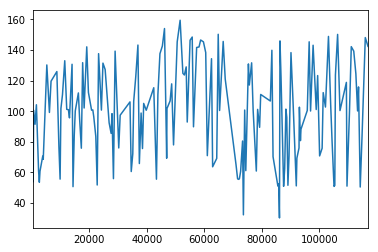

In [72]:
df_trans_smid_2021.tr_item_qty1.plot()
plt.show()

for smid - 2131 tid

In [73]:
df_trans_smid_2131 = fuel_trans_df[(fuel_trans_df.tr_drvr_code == 'SMID') & (fuel_trans_df.tr_unit_id =='2131')]
df_events_levels_smid_2131 = events_levels_df[(events_levels_df['EquipmentID'] == 2131) & (events_levels_df['DriverID'] == 'SMID')]
print(df_trans_smid_2131.shape)
print('total gallons purchased by SMID - 2131(tID) :' , df_trans_smid_2131.tr_item_qty1.sum())
print((df_events_levels_smid_2131.Odometer.max() - df_events_levels_smid_2131.Odometer.min()) /df_trans_smid_2131.tr_item_qty1.sum())


(46, 20)
total gallons purchased by SMID - 2131(tID) : 4356.28
7.25350482903


In [74]:
df_per_smid_2131 = performance_df[(performance_df.DriverID == 'SMID') & (performance_df.EquipmentID == 2131)]
df_per_smid_2131.TotalFuelUsed.sum()

190.60000000000002

In [75]:
Diff_smid_2131 =  df_per_smid_2131.TotalFuelUsed.sum() - df_trans_smid_2131.tr_item_qty1.sum()
print("difference in fuel : " , Diff_smid_2131)

difference in fuel :  -4165.68027344


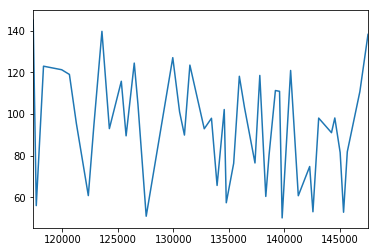

In [76]:
df_trans_smid_2131.tr_item_qty1.plot()
plt.show()

In [77]:
df_trans_smid.columns


Index(['tr_id', 'tr_station_id', 'tr_station_name', 'tr_station_cty',
       'tr_station_st', 'tr_drvr_code', 'tr_unit_id', 'tr_item_cd1',
       'tr_item_qty1', 'tr_item_cd2', 'tr_item_qty2', 'tr_item_cd3',
       'tr_item_qty3', 'tr_item_cd4', 'tr_item_qty4', 'tr_item_cd5',
       'tr_item_qty5', 'tr_item_cd6', 'tr_item_qty6', 'tr_datetime'],
      dtype='object')

In [78]:
df_trans_smid[['tr_datetime','tr_item_qty1']].plot();

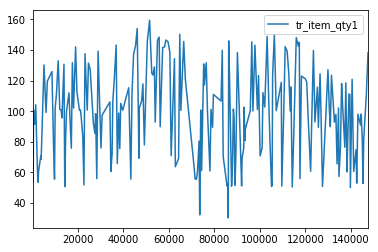

In [79]:
plt.show()

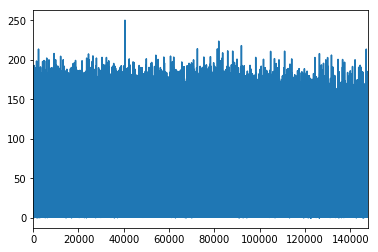

In [80]:
transaction_df.tr_item_qty1.plot()
plt.show()

In [81]:
events_levels_df.columns
 

Index(['EventTimeStamp', 'EquipmentID', 'DriverID', 'Latitude', 'Longitude',
       'LocationTimeStamp', 'Speed', 'Odometer', 'IgnitionStatus',
       'EFReportReason', 'TankLevelPercent', 'TankLevelGallons', 'tankcap'],
      dtype='object')

In [83]:
len(set(events_levels_df.EquipmentID)) # we have total of 629 trucks....

629

In [95]:
transaction_df.columns

Index(['tr_id', 'tr_station_id', 'tr_station_name', 'tr_station_cty',
       'tr_station_st', 'tr_drvr_code', 'tr_unit_id', 'tr_item_cd1',
       'tr_item_qty1', 'tr_item_cd2', 'tr_item_qty2', 'tr_item_cd3',
       'tr_item_qty3', 'tr_item_cd4', 'tr_item_qty4', 'tr_item_cd5',
       'tr_item_qty5', 'tr_item_cd6', 'tr_item_qty6', 'tr_datetime'],
      dtype='object')

In [96]:
len(set(transaction_df.tr_unit_id))

654

In [98]:
transaction_df.tr_unit_id.head(4)

0    1564
1    1584
2    1713
3    1711
Name: tr_unit_id, dtype: category
Categories (655, object): [, 1513, 1520, 1521, ..., 5555, 7777, 9927, OFFICE]

In [106]:
events_levels_df.EquipmentID.head(4)

12649083    1992
12649084    1712
12649092    1713
12649102    1585
Name: EquipmentID, dtype: uint32

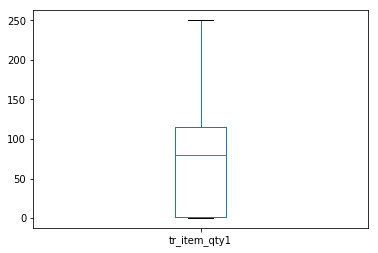

In [110]:
transaction_df['tr_item_qty1'].plot(kind='box')
plt.show()

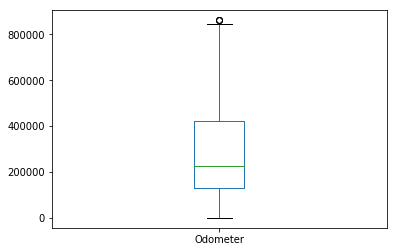

In [164]:
events_levels_df.Odometer.plot(kind='box')
plt.show()

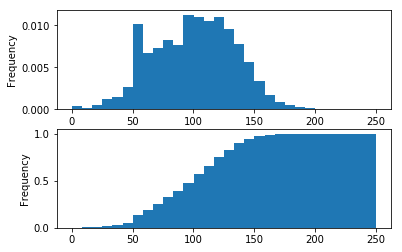

In [166]:
# ploting PDF & CDF for fuel purchased
fig, axes = plt.subplots(nrows=2, ncols=1)
fuel_trans_df.tr_item_qty1.plot(ax=axes[0],kind='hist',normed=True,bins=30) #pdf
fuel_trans_df.tr_item_qty1.plot(ax=axes[1],kind='hist',normed=True,cumulative=True,bins=30) #cdf
plt.show()

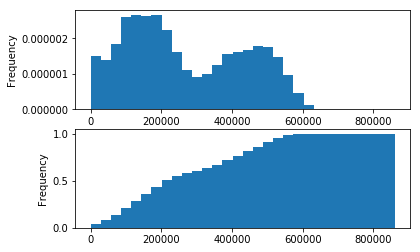

In [167]:
# ploting PDF & CDF for Odometer readings
fig, axes = plt.subplots(nrows=2,ncols=1)
events_levels_df.Odometer.plot(ax=axes[0],kind='hist',normed=True,bins=30) #pdf
events_levels_df.Odometer.plot(ax=axes[1],kind='hist',normed=True,cumulative=True,bins=30) #cdf
plt.show()

In [172]:
events_levels_df.Odometer.max()

861003.90000000002

The median is very useful statistic, especially in the presence of outliers, when it is more robust than the mean.

In [175]:
events_levels_df.Odometer.median()

228204.2

In [ ]:
# max fuel purchased is 250 gallons & the median is 101 g

In [179]:
fuel_trans_df.tr_item_qty1.median() 

101.0999984741211

In [128]:
#there are 4896 fuel transactions less than 50 ULSD
fuel_trans_df[(fuel_trans_df['tr_item_qty1'] >1) & (fuel_trans_df['tr_item_qty1'] <= 50)]


,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime
3,42578722,231100,FJ-BRUNSWICK 627,BRUNSWICK,GA,FOSJA,1711,ULSD,45.000000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-01 01:37:00
44,42589994,516203,PILOT ATLANTA 331,ATLANTA,GA,COOLAW,1549,ULSD,25.010000,DEFD,7.79,,0.0,,0.0,,0.0,,0.0,2017-01-01 09:43:00
71,42597237,516792,FJ RUTHER GLEN 876,RUTHER GLEN,VA,ECKS,1623,ULSD,25.459999,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-01 11:56:00
94,42606809,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,EDEMA,1949,ULSD,23.780001,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-01 14:48:00
105,42610960,516278,PILOT NEWNAN 422,NEWNAN,GA,DONR,1838,ULSD,50.000000,DEFD,14.65,,0.0,,0.0,,0.0,,0.0,2017-01-01 16:07:00
162,42637435,516258,PILOT STAUNTON 396,STAUNTON,VA,ECKS,1623,ULSD,30.170000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-02 07:51:00
164,42637914,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,LINED,1942,ULSD,45.950001,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-02 08:01:00
169,42640321,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,SMAD,1732,ULSD,2.010000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-02 08:44:00
179,42645430,523050,BIG G EXPRESS TERMINAL,GLADEVILLE,TN,LUNR,1781,ULSD,38.150002,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-02 10:01:00
180,42645927,231060,FJ-CARLISLE 708,CARLISLE,PA,VANM,1778,ULSD,2.940000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-02 10:08:00


In [138]:
# 218 transactions less than 5 ULSD gallon purchase --strange.
names_lessthan_5 = fuel_trans_df[fuel_trans_df['tr_item_qty1'] <=5] 


In [145]:
df_trans_shemi = fuel_trans_df[fuel_trans_df['tr_drvr_code'] =='SHEMI']

In [157]:
df_trans_shemi.shape

(222, 20)

In [156]:
df_trans_shemi[df_trans_shemi.tr_datetime == '2018-02-07 15:26:00']

,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime
133043,95522343,516845,LOVES #407 COUNTRY STORE,CARLISLE,PA,SHEMI,1763,ULSD,98.099998,ADD,1.0,,0.0,,0.0,,0.0,,0.0,2018-02-07 15:26:00


In [147]:
df_trans_shemi.tr_unit_id.unique()

[1763, 1606]
Categories (2, object): [1763, 1606]

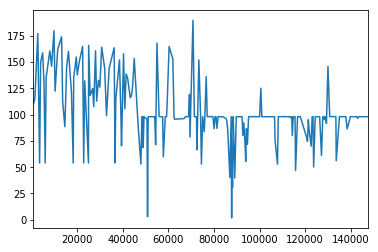

In [148]:
df_trans_shemi.tr_item_qty1.plot();
plt.show()

In [151]:
df_trans_shemi.groupby(['tr_unit_id','tr_datetime','tr_station_name']).size()

tr_unit_id  tr_datetime          tr_station_name          
1606        2017-07-30 19:42:00  PILOT 421                    1
            2017-08-01 14:05:00  LOVES # 277 TRAVEL STOP      1
            2017-08-02 18:58:00  LOVES # 293 TRAVEL STOP      1
            2017-08-03 17:48:00  LOVES # 244 TRAVEL STOP      1
            2017-08-04 09:52:00  LOVES # 238 TRAVEL STOP      1
1763        2017-01-04 08:13:00  PILOT LAVERGNE 052           1
            2017-01-05 15:48:00  FJ MOUNT AIRY 549            1
            2017-01-09 19:30:00  PILOT SULPHUR 050            1
            2017-01-11 16:34:00  PFJ SOUTHEAST 4558           1
            2017-01-12 18:56:00  PILOT HURRICANE MILLS 053    1
            2017-01-16 09:16:00  PILOT LONDON 454             1
            2017-01-17 16:26:00  PILOT DANDRIDGE 226          1
            2017-01-18 18:06:00  PFJ SOUTHEAST 4599           1
            2017-01-19 19:13:00  PILOT LEBANON JUNCTION 39    1
            2017-01-24 19:33:00  PILOT HAYTI 

In [141]:
names_lessthan_5.groupby(['tr_unit_id','tr_drvr_code']).size().sort_values(ascending=False).head(15)

tr_unit_id  tr_drvr_code
1763        SHEMI           3
1621        MOSG            3
1965        CHIW            3
2030        BAET            3
1528        STEMI           2
1890        NARJ            2
1963        SMIGA           2
1957        ECKS            2
1941        BROD03          2
1636        MORE            2
1649        CLOJ            2
1688        WILC01          2
2014        EDWTI           2
1691        BROST           2
1833        SCHPA           2
dtype: int64

#create a new df by computing various variables.....

In [184]:
fuel_trans_df.columns

Index(['tr_id', 'tr_station_id', 'tr_station_name', 'tr_station_cty',
       'tr_station_st', 'tr_drvr_code', 'tr_unit_id', 'tr_item_cd1',
       'tr_item_qty1', 'tr_item_cd2', 'tr_item_qty2', 'tr_item_cd3',
       'tr_item_qty3', 'tr_item_cd4', 'tr_item_qty4', 'tr_item_cd5',
       'tr_item_qty5', 'tr_item_cd6', 'tr_item_qty6', 'tr_datetime'],
      dtype='object')

In [187]:
col_req = [1,5,6,8,19]
tr_sample_100 = fuel_trans_df.iloc[:200,col_req]

In [188]:
tr_sample_100.head(5)

,tr_station_id,tr_drvr_code,tr_unit_id,tr_item_qty1,tr_datetime
1,516202,MANRI,1584,137.399994,2017-01-01 00:48:00
2,516277,RUSR,1713,137.929993,2017-01-01 01:34:00
3,231100,FOSJA,1711,45.000000,2017-01-01 01:37:00
4,523050,HICWIL,1837,107.360001,2017-01-01 03:02:00
5,519125,BATK,1992,93.879997,2017-01-01 03:07:00


In [ ]:
#grping on 3 colms..
#tr_sample_100.groupby(['tr_drvr_code','tr_unit_id','tr_datetime','tr_item_qty1']).size().head(20)

# grping the sampled data according to drvr_code and unit_id ,calculating the total_fuel_purchased and converting it into a df

In [ ]:
#grp_Data = fuel_transactions_df , grp_data_events = events_levels_df ,performance_df = grp_per 

In [222]:
grp_data = pd.DataFrame({'Total_Fuel_Purchased' :
                         tr_sample_100.groupby(['tr_drvr_code','tr_unit_id'])['tr_item_qty1'].sum()
                        }).reset_index()

In [226]:
grp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
tr_drvr_code            174 non-null category
tr_unit_id              174 non-null category
Total_Fuel_Purchased    174 non-null float32
dtypes: category(2), float32(1)
memory usage: 73.9 KB


In [234]:
grp_data.head(5)

,tr_drvr_code,tr_unit_id,Total_Fuel_Purchased
0,ADAR,1950,65.000000
1,ALLMA,1959,98.820000
2,ANDJER,1780,139.570007
3,ARNMA,1609,117.519997
4,AUSTE,1612,70.010002


In [ ]:
'''almo_grp_data = pd.DataFrame({'Qty_cnt' :
almo_slt_models_data.groupby( ['orderDate','Item','State Abv']
          )['Qty'].sum()}).reset_index()'''

#create another df from events_levels_df for summarizing columns

In [227]:
events_levels_df.columns

Index(['EventTimeStamp', 'EquipmentID', 'DriverID', 'Latitude', 'Longitude',
       'LocationTimeStamp', 'Speed', 'Odometer', 'IgnitionStatus',
       'EFReportReason', 'TankLevelPercent', 'TankLevelGallons', 'tankcap'],
      dtype='object')

In [314]:
grp_data_events = pd.DataFrame(events_levels_df.groupby(['DriverID','EquipmentID'])['Odometer'].agg({'min','max'}).add_prefix('odo_')).reset_index()

In [315]:
grp_data_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 4 columns):
DriverID       2151 non-null category
EquipmentID    2151 non-null uint64
odo_min        2151 non-null float64
odo_max        2151 non-null float64
dtypes: category(1), float64(2), uint64(1)
memory usage: 102.1 KB


In [316]:
grp_data_events.head()

,DriverID,EquipmentID,odo_min,odo_max
0,36728,1842,131107.2,131107.2
1,ABBV,1821,174238.5,233502.4
2,ACHC,1623,525710.4,525754.6
3,ADADE,1555,505858.3,505914.4
4,ADAG,1857,119691.4,148476.9


In [317]:
grp_data[grp_data.tr_drvr_code=='BATK']

,tr_drvr_code,tr_unit_id,Total_Fuel_Purchased
9,BATK,1992,192.559998


In [318]:
grp_data_events[grp_data_events.DriverID=='BATK']

,DriverID,EquipmentID,odo_min,odo_max
104,BATK,1562,534774.9,534774.9
105,BATK,1631,456132.3,461478.2
106,BATK,1992,39895.5,130976.5


In [319]:
grp_data_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 4 columns):
DriverID       2151 non-null category
EquipmentID    2151 non-null uint64
odo_min        2151 non-null float64
odo_max        2151 non-null float64
dtypes: category(1), float64(2), uint64(1)
memory usage: 102.1 KB


In [308]:
#grp_data = grp_data.rename(columns={'DriverID': 'tr_drvr_code', 'EquipmentID': 'tr_unit_id'})

In [321]:
grp_data.head(5)

,tr_drvr_code,tr_unit_id,Total_Fuel_Purchased
0,ADAR,1950,65.000000
1,ALLMA,1959,98.820000
2,ANDJER,1780,139.570007
3,ARNMA,1609,117.519997
4,AUSTE,1612,70.010002


In [322]:
grp_data.dtypes

tr_drvr_code            category
tr_unit_id              category
Total_Fuel_Purchased     float32
dtype: object

In [325]:
grp_data_events.dtypes

DriverID       category
EquipmentID    category
odo_min         float64
odo_max         float64
dtype: object

In [324]:
grp_data_events.EquipmentID = grp_data_events.EquipmentID.astype('category')

# merging failure-- dtypes mismatch ..on grp_data , grp_data_events

In [335]:
grp_data.tr_drvr_code.cat.categories

Index(['', '1355', '1973', '1974', '3068', '4051', '6039', '8660', '9781',
       'ABBV',
       ...
       'WORJOS', 'WRAS', 'WRIJON', 'WYLT', 'WYNF', 'YANH', 'YOUJE', 'YOURO',
       'YOUW01', 'ZAMJ'],
      dtype='object', length=939)

In [336]:
grp_data_events.DriverID.cat.categories

Index(['36728', 'ABBV', 'ACHC', 'ADADE', 'ADAG', 'ADAR', 'ALBJ', 'ALBME',
       'ALDS', 'ALLG',
       ...
       'WORJOS', 'WRAS', 'WRIJON', 'WYLT', 'WYNF', 'YANH', 'YOUJE', 'YOURO',
       'YOUW01', 'ZAMJ'],
      dtype='object', length=948)

In [337]:
grp_data_events.DriverID[:5]

0    36728
1     ABBV
2     ACHC
3    ADADE
4     ADAG
Name: DriverID, dtype: category
Categories (948, object): [36728, ABBV, ACHC, ADADE, ..., YOUJE, YOURO, YOUW01, ZAMJ]

In [331]:
grp_data.tr_drvr_code[:5]

0      ADAR
1     ALLMA
2    ANDJER
3     ARNMA
4     AUSTE
Name: tr_drvr_code, dtype: category
Categories (939, object): [, 1355, 1973, 1974, ..., YOUJE, YOURO, YOUW01, ZAMJ]

In [332]:
grp_data.tr_unit_id.cat.categories

Index(['', '1513', '1520', '1521', '1522', '1523', '1524', '1525', '1526',
       '1527',
       ...
       '305', '306', '307', '308', '309', '310', '5555', '7777', '9927',
       'OFFICE'],
      dtype='object', length=655)

In [333]:
grp_data.tr_unit_id[:5]

0    1950
1    1959
2    1780
3    1609
4    1612
Name: tr_unit_id, dtype: category
Categories (655, object): [, 1513, 1520, 1521, ..., 5555, 7777, 9927, OFFICE]

In [338]:
grp_data_events.EquipmentID.cat.categories


UInt64Index([ 301,  302,  303,  304,  305,  306,  307,  308,  309,  310,
             ...
             2146, 2147, 2148, 2150, 2151, 2152, 2153, 2154, 2155, 2156],
            dtype='uint64', length=625)

In [339]:
grp_data_events.EquipmentID[:5]



0    1842
1    1821
2    1623
3    1555
4    1857
Name: EquipmentID, dtype: category
Categories (625, uint64): [301, 302, 303, 304, ..., 2153, 2154, 2155, 2156]

#merged 2 dfs---

In [347]:
new_df = pd.merge(grp_data, grp_data_events,  how='left',left_on=['tr_drvr_code','tr_unit_id'],right_on=['DriverID','EquipmentID'])

In [346]:

print("underlying code for df1 for value '1959' ")
print(grp_data.tr_unit_id[grp_data.tr_unit_id == '1959'][:1].cat.codes.values)
print("underlying code for df2 for value '1959' ")
print(grp_data_events.EquipmentID[grp_data_events.EquipmentID == '1959'][:1].cat.codes.values)


underlying code for df1 for value '1959' 
[440]
underlying code for df2 for value '1959' 
[432]


In [343]:
def trim_categories(df, cols_list):
    for col in cols_list:
        df[col].cat.rename_categories(df[col].cat.categories.astype('str').str.strip(), inplace=True)

In [344]:
trim_categories(grp_data_events, ['EquipmentID', 'DriverID'])

In [359]:
new_df.tail(25)

,tr_drvr_code,tr_unit_id,Total_Fuel_Purchased,DriverID,EquipmentID,odo_min,odo_max,Total_dist_driven,mpg_drvr_truck
149,STEGA,1847,154.080002,STEGA,1847,134266.8,278116.1,143849.3,933.601365
150,STEMI,1528,130.660004,STEMI,1528,587206.3,618110.8,30904.5,236.526092
151,STIHA,1714,116.830002,STIHA,1714,378764.1,513595.8,134831.7,1154.084549
152,SWET,1710,111.330002,SWET,1710,82458.2,477103.0,394644.8,3544.819846
153,TANDA,1526,100.209999,TANDA,1526,576860.3,588854.4,11994.1,119.689653
154,TAYB,1723,114.470001,TAYB,1723,303334.2,363539.5,60205.3,525.948278
155,TAYJON,1589,130.330002,TAYJON,1589,488762.4,555536.4,66774.0,512.345577
156,THOCHA,1693,151.039993,THOCHA,1693,340043.7,468666.4,128622.7,851.580414
157,THOJ01,1654,172.850006,THOJ01,1654,455711.4,513893.9,58182.5,336.606873
158,TOWM,1793,59.340000,TOWM,1793,206754.0,293537.4,86783.4,1462.477246


In [355]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 8 columns):
tr_drvr_code            174 non-null object
tr_unit_id              174 non-null object
Total_Fuel_Purchased    174 non-null float32
DriverID                162 non-null category
EquipmentID             162 non-null category
odo_min                 162 non-null float64
odo_max                 162 non-null float64
Total_dist_driven       162 non-null float64
dtypes: category(2), float32(1), float64(3), object(2)
memory usage: 86.8+ KB


#creating new columns - Total_dist_driven & mpg

In [352]:
new_df['Total_dist_driven'] = new_df['odo_max'] - new_df['odo_min']
new_df['mpg_drvr_truck'] = new_df['Total_dist_driven']/new_df['Total_Fuel_Purchased']

#need to merge the performance data with new_df...

In [362]:
performance_df.columns

Index(['Id', 'ESS_Id', 'EventTimeStamp', 'EquipmentID', 'MCTNumber',
       'EquipmentType', 'DriverID', 'Driver2ID', 'Latitude', 'Longitude',
       'LocationTimeStamp', 'IgnitionStatus', 'TripStatus',
       'DataStartTimeStamp', 'DataEndTimeStamp', 'Distance', 'DriveTime',
       'EngineTime', 'MoveTime', 'IntertripIdleTime', 'ShortIdleTime',
       'OverSpeedTime', 'ExcessSpeedTime', 'TotalFuelUsed', 'IdleFuelUsed',
       'FaultFlag', 'RegisteredDriver', 'CruiseControlTime', 'TopGearTime',
       'GearDataSource', 'SpeedUnits', 'SpeedMatrix'],
      dtype='object')

In [363]:
performance_df.head(5)

,Id,ESS_Id,EventTimeStamp,EquipmentID,MCTNumber,EquipmentType,DriverID,Driver2ID,Latitude,Longitude,...,ExcessSpeedTime,TotalFuelUsed,IdleFuelUsed,FaultFlag,RegisteredDriver,CruiseControlTime,TopGearTime,GearDataSource,SpeedUnits,SpeedMatrix
0,76818,13641356,2017-01-01 07:29:49,1995,105356577,tractor,LYNS,NaN,36.066249,-86.434814,...,0,0.3,0.3,0,0,0,0,3,MPH,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,76819,13641357,2017-01-01 07:29:50,1995,105356577,tractor,LYNS,NaN,36.066249,-86.434814,...,0,239.7,21.2,0,1,49,1399,3,MPH,"301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
3,76821,13643644,2017-01-01 13:58:17,1972,105363528,tractor,DINE,NaN,36.194444,-83.175185,...,0,0.2,0.1,0,0,0,0,3,MPH,"110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
4,76822,13643645,2017-01-01 13:58:18,1972,105363528,tractor,DINE,NaN,36.194444,-83.175185,...,0,202.1,1.5,1,1,12,1298,3,MPH,"112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
5,76823,13643777,2017-01-01 14:19:55,1985,105370056,tractor,GAME,NaN,35.013935,-89.894537,...,0,280.1,3.3,1,1,1158,1789,3,MPH,"22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."


In [382]:
performance_df[(performance_df.DriverID=='YOUW01') & (performance_df.EquipmentID==1706)].iloc[ :10,10:]

,LocationTimeStamp,IgnitionStatus,TripStatus,DataStartTimeStamp,DataEndTimeStamp,Distance,DriveTime,EngineTime,MoveTime,IntertripIdleTime,...,ExcessSpeedTime,TotalFuelUsed,IdleFuelUsed,FaultFlag,RegisteredDriver,CruiseControlTime,TopGearTime,GearDataSource,SpeedUnits,SpeedMatrix
188,2017-01-03 04:24:50,2,O,2016-12-27 04:22:00,2017-01-03 04:24:00,2634,3085,3135,2934,11,...,0,407.8,2.5,0,1,1161,2168,3,MPH,"28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
718,2017-01-10 04:27:43,2,O,2017-01-03 04:24:00,2017-01-10 04:27:00,2794,3090,3113,2962,13,...,0,368.3,2.6,0,1,1633,2376,3,MPH,"16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
1314,2017-01-17 04:18:43,1,I,2017-01-10 04:27:00,2017-01-17 04:18:00,1867,2142,2165,2014,0,...,0,252.2,1.8,0,1,852,1570,3,MPH,"18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
1923,2017-01-24 04:17:33,1,O,2017-01-17 04:18:00,2017-01-24 04:18:00,2697,2982,6903,2821,3921,...,0,449.5,47.1,0,1,1529,2300,3,MPH,"16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
2620,2017-01-31 04:13:40,2,O,2017-01-24 04:18:00,2017-01-31 04:13:00,2114,2458,3038,2307,556,...,0,308.0,8.7,0,1,1049,1729,3,MPH,"19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
3491,2017-02-07 04:14:55,2,O,2017-01-31 04:13:00,2017-02-07 04:15:00,3318,3783,3827,3605,13,...,0,514.8,1.7,0,1,1938,2722,3,MPH,"50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
3890,2017-02-14 04:15:41,2,O,2017-02-07 04:15:00,2017-02-14 04:15:00,2996,3362,3385,3170,0,...,0,417.5,3.1,0,1,2010,2517,3,MPH,"56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
4762,2017-02-21 04:09:26,2,O,2017-02-14 04:15:00,2017-02-21 04:09:00,2247,2631,2652,2485,5,...,0,317.6,2.3,0,1,1279,1831,3,MPH,"18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
5048,2017-02-28 04:20:29,2,O,2017-02-21 04:09:00,2017-02-28 04:20:00,3021,3469,3502,3271,8,...,0,422.6,2.5,0,1,1776,2520,3,MPH,"34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
6161,2017-03-07 10:02:59,2,O,2017-02-28 04:20:00,2017-03-07 10:02:00,2380,2689,2714,2525,0,...,0,342.8,2.3,0,1,1576,1994,3,MPH,"351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."


In [364]:
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32253 entries, 0 to 32386
Data columns (total 32 columns):
Id                    32253 non-null int64
ESS_Id                32253 non-null int64
EventTimeStamp        32253 non-null datetime64[ns]
EquipmentID           32253 non-null int64
MCTNumber             32253 non-null int64
EquipmentType         32253 non-null object
DriverID              29712 non-null object
Driver2ID             110 non-null object
Latitude              32253 non-null float64
Longitude             32253 non-null float64
LocationTimeStamp     32253 non-null datetime64[ns]
IgnitionStatus        32253 non-null int64
TripStatus            32253 non-null object
DataStartTimeStamp    32253 non-null datetime64[ns]
DataEndTimeStamp      32253 non-null datetime64[ns]
Distance              32253 non-null int64
DriveTime             32253 non-null int64
EngineTime            32253 non-null int64
MoveTime              32253 non-null int64
IntertripIdleTime     32253 non-

In [ ]:
'''grp_per = pd.DataFrame({'Total_Fuel_Purchased' :
                         tr_sample_100.groupby(['tr_drvr_code','tr_unit_id'])['tr_item_qty1'].sum()
                        }).reset_index()
                        '''

In [397]:
grp_per = pd.DataFrame(performance_df.groupby(['DriverID','EquipmentID'])['TotalFuelUsed','Distance'].sum().add_prefix('Perf_')).reset_index()

In [398]:
grp_per.head(5)

,DriverID,EquipmentID,Perf_TotalFuelUsed,Perf_Distance
0,000000000,243,2.2,3
1,000000000,1519,0.0,0
2,000000000,1551,0.3,0
3,000000000,1554,0.0,0
4,000000000,1562,3.5,37


In [399]:
grp_per.dtypes

DriverID               object
EquipmentID             int64
Perf_TotalFuelUsed    float64
Perf_Distance           int64
dtype: object

In [400]:
grp_per.DriverID = grp_per.DriverID.astype('category')

In [401]:
grp_per.EquipmentID = grp_per.EquipmentID.astype('category')

In [402]:
grp_per.DriverID.cat.categories

Index(['000000000', '000001045', '000001559', '000002033', 'ABBV', 'ADAG',
       'ADAR', 'ALBJ', 'ALBME', 'ALDS',
       ...
       'WORJON', 'WORJOS', 'WRAS', 'WRIJON', 'WYLT', 'WYNF', 'YANH', 'YOUJE',
       'YOUW01', 'ZAMJ'],
      dtype='object', length=810)

In [404]:
trim_categories(grp_per, ['EquipmentID', 'DriverID'])

In [405]:
new_df_merged  = pd.merge(new_df, grp_per,  how='left',left_on=['tr_drvr_code','tr_unit_id'],right_on=['DriverID','EquipmentID'])

In [472]:
new_df_merged.head(50)

,tr_drvr_code,tr_unit_id,Total_Fuel_Purchased,DriverID_x,EquipmentID_x,odo_min,odo_max,Total_dist_driven,mpg_drvr_truck,DriverID_y,EquipmentID_y,Perf_TotalFuelUsed,Perf_Distance,mpg_perf,diff_fuel_purchased
0,ADAR,1950,65.000000,ADAR,1950,69148.0,226432.8,157284.8,2419.766154,ADAR,1950,16884.6,124691.0,7.384895,-16819.600000
1,ALLMA,1959,98.820000,ALLMA,1959,63842.8,98892.4,35049.6,354.681240,ALLMA,1959,4553.2,34387.0,7.552271,-4454.380000
2,ANDJER,1780,139.570007,ANDJER,1780,279595.0,408374.3,128779.3,922.686059,ANDJER,1780,16896.3,129851.0,7.685174,-16756.729993
3,ARNMA,1609,117.519997,NaN,NaN,NaN,NaN,NaN,NaN,ARNMA,1609,834.8,5532.0,6.626737,-717.280003
4,AUSTE,1612,70.010002,AUSTE,1612,489217.3,607226.5,118009.2,1685.604862,AUSTE,1612,14396.5,109863.0,7.631230,-14326.489998
5,BAET,1675,54.290001,BAET,1675,403226.0,421442.4,18216.4,335.538768,BAET,1675,2590.8,18428.0,7.112861,-2536.509999
6,BAIJO,1513,50.020000,BAIJO,1513,529067.8,529407.2,339.4,6.785286,NaN,NaN,NaN,NaN,NaN,NaN
7,BALDO,1810,57.419998,BALDO,1810,130462.9,131946.3,1483.4,25.834205,BALDO,1810,231.6,1661.0,7.171848,-174.180002
8,BARW,1576,79.760002,BARW,1576,491358.0,599274.6,107916.6,1353.016513,NaN,NaN,NaN,NaN,NaN,NaN
9,BATK,1992,192.559998,BATK,1992,39895.5,130976.5,91081.0,473.000629,BATK,1992,12722.1,92076.0,7.237484,-12529.540002


In [419]:
new_df_merged.mpg_perf.isnull().any()

True

In [407]:
new_df_merged['mpg_perf'] = new_df_merged['Perf_Distance']/new_df_merged['Perf_TotalFuelUsed']

In [425]:
new_df_merged['diff_fuel_purchased'] = new_df_merged['Total_Fuel_Purchased'] - new_df_merged['Perf_TotalFuelUsed']

In [427]:
new_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 15 columns):
tr_drvr_code            174 non-null object
tr_unit_id              174 non-null object
Total_Fuel_Purchased    174 non-null float32
DriverID_x              162 non-null category
EquipmentID_x           162 non-null category
odo_min                 162 non-null float64
odo_max                 162 non-null float64
Total_dist_driven       162 non-null float64
mpg_drvr_truck          162 non-null float64
DriverID_y              170 non-null category
EquipmentID_y           170 non-null category
Perf_TotalFuelUsed      170 non-null float64
Perf_Distance           170 non-null float64
mpg_perf                170 non-null float64
diff_fuel_purchased     170 non-null float64
dtypes: category(4), float32(1), float64(8), object(2)
memory usage: 165.4+ KB


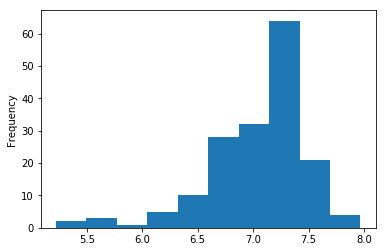

In [409]:
new_df_merged.mpg_perf.plot(kind='hist');
plt.show()

In [410]:
import seaborn as sns


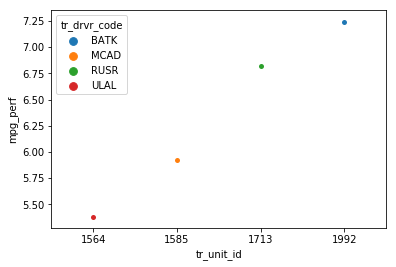

In [424]:
ax = sns.swarmplot(x='tr_unit_id', y='mpg_perf',data=new_df_merged[new_df_merged.tr_unit_id.isin(['1564','1585','1712','1713','1992'])],hue='tr_drvr_code')
plt.show()

In [422]:
new_df_merged[new_df_merged.tr_unit_id.isin(['1564','1585','1712','1713','1992])]

,tr_drvr_code,tr_unit_id,Total_Fuel_Purchased,DriverID_x,EquipmentID_x,odo_min,odo_max,Total_dist_driven,mpg_drvr_truck,DriverID_y,EquipmentID_y,Perf_TotalFuelUsed,Perf_Distance,mpg_perf
9,BATK,1992,192.559998,BATK,1992,39895.5,130976.5,91081.0,473.000629,BATK,1992,12722.1,92076.0,7.237484
110,MCAD,1585,131.690002,MCAD,1585,513931.8,531001.6,17069.8,129.621077,MCAD,1585,2982.2,17662.0,5.922473
137,RUSR,1713,137.929993,RUSR,1713,377577.4,429448.8,51871.4,376.070490,RUSR,1713,7856.4,53596.0,6.821954
160,ULAL,1564,76.870003,ULAL,1564,498691.0,520499.8,21808.8,283.710150,ULAL,1564,4410.7,23739.0,5.382139


#Creating a new dataframe for req fields....


##############################

In [ ]:
#creating a new dataframe with required variables

#extracting the transactions details from fuel transactions df
grp_transactions = pd.DataFrame({'Total_Fuel_Purchased' :
                         fuel_trans_df.groupby(['tr_drvr_code','tr_unit_id'])['tr_item_qty1'].sum()
                        }).reset_index()

#extracting the min and max odometer reading for every truck and driver combo
grp_data_events = pd.DataFrame(events_levels_df.groupby(['DriverID','EquipmentID'])['Odometer'].agg({'min','max'}).add_prefix('odo_')).reset_index()

#triming the spaces 
trim_categories(grp_transactions, ['tr_drvr_code', 'tr_unit_id'])

#converting the truckID data type as category
grp_data_events.EquipmentID = grp_data_events.EquipmentID.astype('category')

trim_categories(grp_data_events, ['DriverID', 'EquipmentID'])

#merging the trasactions details and events dataframe
grp_trans_events = pd.merge(grp_transactions, grp_data_events,  how='left',left_on=['tr_drvr_code','tr_unit_id'],right_on=['DriverID','EquipmentID'])

#computing the total distance drives and mpg for drvr+truck combo
grp_trans_events['Total_dist_driven'] = grp_trans_events['odo_max'] - grp_trans_events['odo_min']
grp_trans_events['mpg_drvr_truck'] = grp_trans_events['Total_dist_driven']/grp_trans_events['Total_Fuel_Purchased']

#extracting the variables from performance dataset
grp_per = pd.DataFrame(performance_df.groupby(['DriverID','EquipmentID'])['TotalFuelUsed','Distance'].sum().add_prefix('Perf_')).reset_index()


grp_per.DriverID = grp_per.DriverID.astype('category')
grp_per.EquipmentID = grp_per.EquipmentID.astype('category')
trim_categories(grp_per, ['EquipmentID', 'DriverID'])

#final merge of transactions,events_fuel and performance df's
grp_merged  = pd.merge(grp_trans_events, grp_per,  how='left',left_on=['tr_drvr_code','tr_unit_id'],right_on=['DriverID','EquipmentID'])

#computing the difference for each truck and drvier's combo, the fuel purchased and the fuel burnt.... 
grp_merged['mpg_perf'] = grp_merged['Perf_Distance']/grp_merged['Perf_TotalFuelUsed']
grp_merged['diff_fuel_purchased'] = grp_merged['Total_Fuel_Purchased'] - grp_merged['Perf_TotalFuelUsed']

#converting the df into a csv file 
##grp_merged.sort_values('diff_fuel_purchased',ascending=False).to_csv('output.csv')
'''


In [513]:
grp_transactions = pd.DataFrame({'Total_Fuel_Purchased' :
                         fuel_trans_df.groupby(['tr_drvr_code','tr_unit_id'])['tr_item_qty1'].sum()
                        }).reset_index()

In [514]:
grp_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 3 columns):
tr_drvr_code            1797 non-null category
tr_unit_id              1797 non-null category
Total_Fuel_Purchased    1797 non-null float32
dtypes: category(2), float32(1)
memory usage: 86.6 KB


In [515]:
grp_data_events = pd.DataFrame(events_levels_df.groupby(['DriverID','EquipmentID'])['Odometer'].agg({'min','max'}).add_prefix('odo_')).reset_index()

In [516]:
grp_data_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 4 columns):
DriverID       2151 non-null category
EquipmentID    2151 non-null uint64
odo_min        2151 non-null float64
odo_max        2151 non-null float64
dtypes: category(1), float64(2), uint64(1)
memory usage: 102.1 KB


In [517]:
trim_categories(grp_transactions, ['tr_drvr_code', 'tr_unit_id'])

In [518]:
grp_data_events.EquipmentID = grp_data_events.EquipmentID.astype('category')
#transaction_df.tr_time = transaction_df.tr_time.astype(str)

In [519]:
trim_categories(grp_data_events, ['DriverID', 'EquipmentID'])

In [520]:
grp_trans_events = pd.merge(grp_transactions, grp_data_events,  how='left',left_on=['tr_drvr_code','tr_unit_id'],right_on=['DriverID','EquipmentID'])

In [521]:
grp_trans_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797 entries, 0 to 1796
Data columns (total 7 columns):
tr_drvr_code            1797 non-null object
tr_unit_id              1797 non-null object
Total_Fuel_Purchased    1797 non-null float32
DriverID                1619 non-null category
EquipmentID             1619 non-null category
odo_min                 1619 non-null float64
odo_max                 1619 non-null float64
dtypes: category(2), float32(1), float64(2), object(2)
memory usage: 156.5+ KB


In [522]:
grp_trans_events.tail(5)

,tr_drvr_code,tr_unit_id,Total_Fuel_Purchased,DriverID,EquipmentID,odo_min,odo_max
1792,YOURO,1737,3538.209961,NaN,NaN,NaN,NaN
1793,YOURO,1769,188.290009,YOURO,1769,386732.5,387599.7
1794,YOURO,2094,409.239990,YOURO,2094,44681.0,44719.1
1795,YOUW01,1706,7216.830078,YOUW01,1706,323390.3,370166.5
1796,ZAMJ,1588,4419.149902,ZAMJ,1588,452983.2,481337.6


In [523]:
grp_trans_events['Total_dist_driven'] = grp_trans_events['odo_max'] - grp_trans_events['odo_min']
grp_trans_events['mpg_drvr_truck'] = grp_trans_events['Total_dist_driven']/grp_trans_events['Total_Fuel_Purchased']

In [524]:
grp_per = pd.DataFrame(performance_df.groupby(['DriverID','EquipmentID'])['TotalFuelUsed','Distance'].sum().add_prefix('Perf_')).reset_index()

In [525]:
grp_per.DriverID = grp_per.DriverID.astype('category')
grp_per.EquipmentID = grp_per.EquipmentID.astype('category')
trim_categories(grp_per, ['EquipmentID', 'DriverID'])

In [526]:
grp_merged  = pd.merge(grp_trans_events, grp_per,  how='left',left_on=['tr_drvr_code','tr_unit_id'],right_on=['DriverID','EquipmentID'])

In [527]:
grp_merged['mpg_perf'] = grp_merged['Perf_Distance']/grp_merged['Perf_TotalFuelUsed']
grp_merged['diff_fuel_purchased'] = grp_merged['Total_Fuel_Purchased'] - grp_merged['Perf_TotalFuelUsed']

In [528]:
grp_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797 entries, 0 to 1796
Data columns (total 15 columns):
tr_drvr_code            1797 non-null object
tr_unit_id              1797 non-null object
Total_Fuel_Purchased    1797 non-null float32
DriverID_x              1619 non-null category
EquipmentID_x           1619 non-null category
odo_min                 1619 non-null float64
odo_max                 1619 non-null float64
Total_dist_driven       1619 non-null float64
mpg_drvr_truck          1619 non-null float64
DriverID_y              1358 non-null category
EquipmentID_y           1358 non-null category
Perf_TotalFuelUsed      1358 non-null float64
Perf_Distance           1358 non-null float64
mpg_perf                1351 non-null float64
diff_fuel_purchased     1358 non-null float64
dtypes: category(4), float32(1), float64(8), object(2)
memory usage: 318.9+ KB


In [529]:
fuel_trans_df[(fuel_trans_df.tr_unit_id == 2046)]

,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime


In [541]:

trans_df.tr_drvr_code=='WAGL') & (fuel_trans_df.tr_unit_id== '1534')]

,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime
495,42755127,231813,FJ-FORT PIERCE 622,FORT PIERCE,FL,WAGL,1534,ULSD,115.129997,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-03 13:08:00
1962,43244834,516607,LOVES # 320 TRAVEL STOP,DUBLIN,GA,WAGL,1534,ULSD,144.929993,DEFD,11.98,,0.0,,0.0,,0.0,,0.0,2017-01-07 08:57:00
2464,43418503,516641,LOVES # 360 TRAVEL STOP,HORSE CAVE,KY,WAGL,1534,ULSD,54.070000,CADV,1.00,,0.0,,0.0,,0.0,,0.0,2017-01-09 09:01:00
3205,43662675,516035,PILOT PORTERSVILLE NEW C,PORTERSVILLE,PA,WAGL,1534,ULSD,144.630005,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-11 05:34:00
4026,43940637,516209,PILOT CAYCE (COLUMBIA ARE,CAYCE (COLUMBIA,SC,WAGL,1534,ULSD,124.680000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-13 05:43:00
4564,44121627,516234,PILOT BIRMINGHAM 369,BIRMINGHAM,AL,WAGL,1534,ULSD,147.550003,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-14 18:14:00
5613,44480100,521834,PILOT JASPER 500,JASPER,FL,WAGL,1534,ULSD,182.199997,DEFD,13.50,CADV,1.0,,0.0,,0.0,,0.0,2017-01-18 06:06:00
7183,44985088,516641,LOVES # 360 TRAVEL STOP,HORSE CAVE,KY,WAGL,1534,ULSD,104.889999,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-22 15:05:00
9170,45682275,516640,LOVES # 358 TRAVEL STOP,SHARTLESVILLE,PA,WAGL,1534,ULSD,182.839996,CADV,1.00,,0.0,,0.0,,0.0,,0.0,2017-01-27 17:25:00
9611,45853169,231100,FJ-BRUNSWICK 627,BRUNSWICK,GA,WAGL,1534,ULSD,54.110001,DEFD,7.15,CADV,1.0,,0.0,,0.0,,0.0,2017-01-29 15:24:00


In [542]:
events_levels_df[(events_levels_df.EquipmentID== 1534) & (events_levels_df.DriverID=='WAGL')][:50]

,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Odometer,IgnitionStatus,EFReportReason,TankLevelPercent,TankLevelGallons,tankcap
12654108,2017-01-01 21:06:36.953,1534,WAGL,32.57565,-82.83523,2017-01-01 21:06:36,0,478171.4,2,0,58.299999,145.75,250
12654110,2017-01-01 21:07:36.953,1534,WAGL,32.57565,-82.83523,2017-01-01 21:07:36,0,478171.4,2,1,58.299999,145.75,250
12667445,2017-01-03 04:59:05.657,1534,WAGL,32.57568,-82.83524,2017-01-03 04:59:05,0,478171.4,1,0,56.799999,142.00,250
12667519,2017-01-03 05:06:35.640,1534,WAGL,32.57568,-82.83527,2017-01-03 05:06:35,0,478171.4,2,1,56.799999,142.00,250
12667542,2017-01-03 05:09:35.657,1534,WAGL,32.57568,-82.83526,2017-01-03 05:09:35,0,478171.4,1,1,56.900002,142.25,250
12667559,2017-01-03 05:11:35.687,1534,WAGL,32.57487,-82.83558,2017-01-03 05:11:35,2,478171.5,1,0,56.900002,142.25,250
12667676,2017-01-03 05:26:35.797,1534,WAGL,32.51808,-82.95396,2017-01-03 05:26:35,50,478179.6,1,2,55.299999,138.25,250
12667724,2017-01-03 05:32:45.827,1534,WAGL,32.49903,-82.97733,2017-01-03 05:32:45,0,478181.7,2,1,56.500000,141.25,250
12667773,2017-01-03 05:39:05.857,1534,WAGL,32.49904,-82.97733,2017-01-03 05:39:05,0,478181.7,1,1,60.400002,151.00,250
12667783,2017-01-03 05:41:05.890,1534,WAGL,32.49903,-82.97733,2017-01-03 05:41:05,0,478181.7,1,0,60.400002,151.00,250


In [531]:
events_levels_df[(events_levels_df.DriverID=='SHATHO')] # & (events_levels_df.EquipmentID==1617)

,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Odometer,IgnitionStatus,EFReportReason,TankLevelPercent,TankLevelGallons,tankcap
17710817,2017-09-22 00:55:05.733,1580,SHATHO,36.06731,-86.43350,2017-09-22 00:55:05,0,552330.1,1,1,64.900002,162.250000,250
17710855,2017-09-22 00:57:05.717,1580,SHATHO,36.06741,-86.43425,2017-09-22 00:57:05,0,552330.2,1,0,63.599998,159.000000,250
17710856,2017-09-22 01:02:25.717,1580,SHATHO,36.06749,-86.43474,2017-09-22 01:02:25,0,552330.2,2,1,55.000000,137.500000,250
17710863,2017-09-22 01:04:25.733,1580,SHATHO,36.06749,-86.43531,2017-09-22 01:04:24,5,552330.2,1,1,55.000000,137.500000,250
17710940,2017-09-22 01:06:25.717,1580,SHATHO,36.06881,-86.42915,2017-09-22 01:06:25,13,552330.7,1,0,55.000000,137.500000,250
17710941,2017-09-22 01:15:35.780,1580,SHATHO,36.12395,-86.39874,2017-09-22 01:15:35,0,552336.2,2,1,55.000000,137.500000,250
17710954,2017-09-22 01:19:05.780,1580,SHATHO,36.12365,-86.39890,2017-09-22 01:19:05,0,552336.3,2,1,55.000000,137.500000,250
17710963,2017-09-22 01:20:35.797,1580,SHATHO,36.12363,-86.39892,2017-09-22 01:20:35,0,552336.3,2,0,55.000000,137.500000,250
17710968,2017-09-22 01:22:55.810,1580,SHATHO,36.12292,-86.39579,2017-09-22 01:22:55,12,552336.4,1,1,55.000000,137.500000,250
17710994,2017-09-22 01:24:55.810,1580,SHATHO,36.12131,-86.39820,2017-09-22 01:24:55,10,552336.8,1,0,55.000000,137.500000,250



#1797 observations --after merging the transactions with event _level & performance dataset

In [532]:
#converting the merged dataframe to a csv file
#grp_merged.sort_values('diff_fuel_purchased',ascending=False).to_csv('output.csv')
grp_merged.sort_values('diff_fuel_purchased',ascending=False)

,tr_drvr_code,tr_unit_id,Total_Fuel_Purchased,DriverID_x,EquipmentID_x,odo_min,odo_max,Total_dist_driven,mpg_drvr_truck,DriverID_y,EquipmentID_y,Perf_TotalFuelUsed,Perf_Distance,mpg_perf,diff_fuel_purchased
1684,WAGL,1534,14154.900391,WAGL,1534,478171.4,501430.6,23259.2,1.643191,WAGL,1534,3171.6,21266.0,6.705133,10983.300391
300,CHAD,2046,9721.559570,CHAD,2046,18.2,68778.3,68760.1,7.072950,CHAD,2046,325.5,2405.0,7.388633,9396.059570
256,BYRCHR,1734,23087.189453,BYRCHR,1734,383534.9,534897.7,151362.8,6.556138,BYRCHR,1734,15385.8,108548.0,7.055077,7701.389453
173,BOUB,1926,27916.279297,BOUB,1926,92640.9,306093.7,213452.8,7.646177,BOUB,1926,20690.9,148628.0,7.183254,7225.379297
1233,PEAD,1584,7179.939941,NaN,NaN,NaN,NaN,NaN,NaN,PEAD,1584,0.0,1.0,inf,7179.939941
1157,NANP,1899,22027.359375,NANP,1899,57819.3,241628.6,183809.3,8.344591,NANP,1899,14865.0,108378.0,7.290817,7162.359375
650,GRAJOH,1645,12789.889648,GRAJOH,1645,516558.7,603582.6,87023.9,6.804117,GRAJOH,1645,5717.3,39234.0,6.862330,7072.589648
168,BONZ,1919,26611.330078,BONZ,1919,89987.2,281024.2,191037.0,7.178784,BONZ,1919,19774.8,144467.0,7.305611,6836.530078
183,BRAE,1943,25469.990234,BRAE,1943,85048.6,258473.7,173425.1,6.808998,BRAE,1943,18718.3,133695.0,7.142476,6751.690234
1436,SAVE,1934,26680.240234,SAVE,1934,91862.0,282397.8,190535.8,7.141457,SAVE,1934,20314.9,148954.0,7.332254,6365.340234


In [559]:
#making a copy of the merged df to drop duplicate columns which was used for cross checking
final_df = grp_merged

In [561]:
final_df = final_df.sort_values('diff_fuel_purchased',ascending=False)

In [562]:
final_df.head(5)

,tr_drvr_code,tr_unit_id,Total_Fuel_Purchased,DriverID_x,EquipmentID_x,odo_min,odo_max,Total_dist_driven,mpg_drvr_truck,DriverID_y,EquipmentID_y,Perf_TotalFuelUsed,Perf_Distance,mpg_perf,diff_fuel_purchased
1684,WAGL,1534,14154.900391,WAGL,1534,478171.4,501430.6,23259.2,1.643191,WAGL,1534,3171.6,21266.0,6.705133,10983.300391
300,CHAD,2046,9721.559570,CHAD,2046,18.2,68778.3,68760.1,7.072950,CHAD,2046,325.5,2405.0,7.388633,9396.059570
256,BYRCHR,1734,23087.189453,BYRCHR,1734,383534.9,534897.7,151362.8,6.556138,BYRCHR,1734,15385.8,108548.0,7.055077,7701.389453
173,BOUB,1926,27916.279297,BOUB,1926,92640.9,306093.7,213452.8,7.646177,BOUB,1926,20690.9,148628.0,7.183254,7225.379297
1233,PEAD,1584,7179.939941,NaN,NaN,NaN,NaN,NaN,NaN,PEAD,1584,0.0,1.0,inf,7179.939941


In [566]:
final_df.columns

Index(['tr_drvr_code', 'tr_unit_id', 'Total_Fuel_Purchased', 'DriverID_x',
       'EquipmentID_x', 'odo_min', 'odo_max', 'Total_dist_driven',
       'mpg_drvr_truck', 'DriverID_y', 'EquipmentID_y', 'Perf_TotalFuelUsed',
       'Perf_Distance', 'mpg_perf', 'diff_fuel_purchased'],
      dtype='object')

In [567]:
final_df.drop(['DriverID_x', 'EquipmentID_x','DriverID_y','EquipmentID_y'], axis=1, inplace=True)

In [569]:
final_df.head()

,tr_drvr_code,tr_unit_id,Total_Fuel_Purchased,odo_min,odo_max,Total_dist_driven,mpg_drvr_truck,Perf_TotalFuelUsed,Perf_Distance,mpg_perf,diff_fuel_purchased
1684,WAGL,1534,14154.900391,478171.4,501430.6,23259.2,1.643191,3171.6,21266.0,6.705133,10983.300391
300,CHAD,2046,9721.559570,18.2,68778.3,68760.1,7.072950,325.5,2405.0,7.388633,9396.059570
256,BYRCHR,1734,23087.189453,383534.9,534897.7,151362.8,6.556138,15385.8,108548.0,7.055077,7701.389453
173,BOUB,1926,27916.279297,92640.9,306093.7,213452.8,7.646177,20690.9,148628.0,7.183254,7225.379297
1233,PEAD,1584,7179.939941,NaN,NaN,NaN,NaN,0.0,1.0,inf,7179.939941


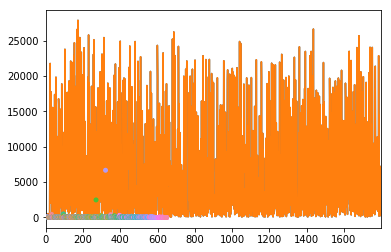

In [512]:
grp_merged.Total_Fuel_Purchased.plot();
plt.show()

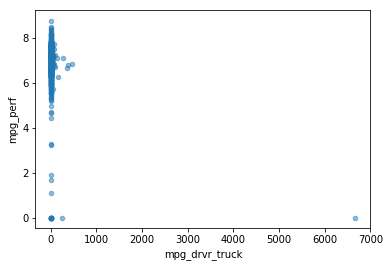

In [534]:
grp_merged.plot(kind='scatter',x='mpg_drvr_truck',y='mpg_perf',marker='o',alpha=0.5);
plt.show()

#  good drivers -----'SMID', 'BEVL', 'RICS', 'NEWR', 'MARC', 'LOVH'    

In [505]:
grp_merged[grp_merged.tr_drvr_code.isin(['SMID','BEVL','RICS','NEWR','MARC','LOVH'])].to_csv('good_drivers_results.csv')



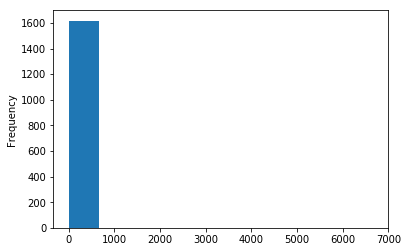

In [463]:
grp_merged.mpg_drvr_truck.plot(kind='hist');
plt.show()



In [ ]:
#ax = sns.swarmplot(x='tr_unit_id', y='mpg_drvr_truck',data=grp_merged,hue='tr_drvr_code')
#plt.show()

In [ ]:
#df.loc['2015-2'] -  returns the tr rows of feb month for the year 2015


In [544]:
grp_merged.columns

Index(['tr_drvr_code', 'tr_unit_id', 'Total_Fuel_Purchased', 'DriverID_x',
       'EquipmentID_x', 'odo_min', 'odo_max', 'Total_dist_driven',
       'mpg_drvr_truck', 'DriverID_y', 'EquipmentID_y', 'Perf_TotalFuelUsed',
       'Perf_Distance', 'mpg_perf', 'diff_fuel_purchased'],
      dtype='object')

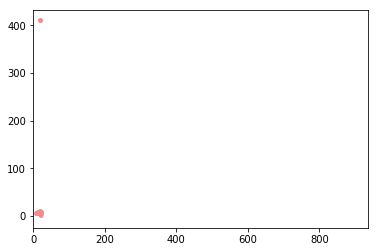

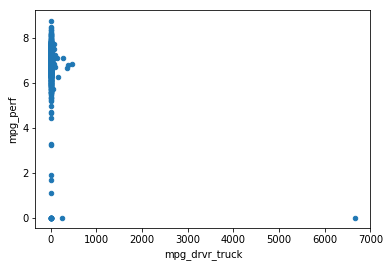

In [557]:
grp_merged.plot(kind='scatter',x='mpg_drvr_truck',y='mpg_perf')
plt.show()

# want to focus on driver wagl + truck 1534 -- as his fuel transcations are very high


In [546]:
df_trans_wagl_1534 = fuel_trans_df[(fuel_trans_df.tr_drvr_code=='WAGL') & (fuel_trans_df.tr_unit_id== '1534')]

In [547]:
df_events_wagl_1534 = events_levels_df[(events_levels_df.EquipmentID== 1534) & (events_levels_df.DriverID=='WAGL')]

In [552]:
df_trans_wagl_1534 = df_trans_wagl_1534.sort_values('tr_datetime')

In [ ]:
#fuel_trans_df.tr_drvr_code=='BUNC'


In [553]:
df_trans_wagl_1534.head()

,tr_id,tr_station_id,tr_station_name,tr_station_cty,tr_station_st,tr_drvr_code,tr_unit_id,tr_item_cd1,tr_item_qty1,tr_item_cd2,tr_item_qty2,tr_item_cd3,tr_item_qty3,tr_item_cd4,tr_item_qty4,tr_item_cd5,tr_item_qty5,tr_item_cd6,tr_item_qty6,tr_datetime
495,42755127,231813,FJ-FORT PIERCE 622,FORT PIERCE,FL,WAGL,1534,ULSD,115.129997,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-03 13:08:00
1962,43244834,516607,LOVES # 320 TRAVEL STOP,DUBLIN,GA,WAGL,1534,ULSD,144.929993,DEFD,11.98,,0.0,,0.0,,0.0,,0.0,2017-01-07 08:57:00
2464,43418503,516641,LOVES # 360 TRAVEL STOP,HORSE CAVE,KY,WAGL,1534,ULSD,54.070000,CADV,1.00,,0.0,,0.0,,0.0,,0.0,2017-01-09 09:01:00
3205,43662675,516035,PILOT PORTERSVILLE NEW C,PORTERSVILLE,PA,WAGL,1534,ULSD,144.630005,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-11 05:34:00
4026,43940637,516209,PILOT CAYCE (COLUMBIA ARE,CAYCE (COLUMBIA,SC,WAGL,1534,ULSD,124.680000,,0.00,,0.0,,0.0,,0.0,,0.0,2017-01-13 05:43:00


In [555]:
df_trans_wagl_1534.dtypes

tr_id                      uint32
tr_station_id               int64
tr_station_name            object
tr_station_cty             object
tr_station_st              object
tr_drvr_code             category
tr_unit_id               category
tr_item_cd1              category
tr_item_qty1              float32
tr_item_cd2              category
tr_item_qty2              float32
tr_item_cd3              category
tr_item_qty3              float32
tr_item_cd4              category
tr_item_qty4              float32
tr_item_cd5              category
tr_item_qty5              float32
tr_item_cd6              category
tr_item_qty6              float32
tr_datetime        datetime64[ns]
dtype: object

In [558]:
#df_trans_wagl_1534.plot(kind='scatter',x='tr_datetime',y='tr_item_qty1')
sns.pointplot(x = 'tr_datetime',
             y = 'tr_item_qty1',
             hue = 'tr_drvr_code',
             data = df_trans_wagl_1534)
plt.show()

KeyboardInterrupt: 